# Question 1: Problem Definition
To create a robust customer churn prediction system, which accurately forecast customer churn and provides insight for implementing targeted retention initiatives.

# Question 2: Exploratory Data Analysis (EDA)

## 1. Preparations and Data Reading

In [1]:
# 1.1 Importing necessary libraries for EDA and ML

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
import missingno as msno
from collections import Counter

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
# pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Set the default style
style.use("default")

In [2]:
# 1.2 Reading the dataset

df = pd.read_csv(r"C:\Users\yanni\Desktop\Capstone Project\ConnectTel Customer Churn Prediction.csv", index_col=0)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

In [3]:
# Data Head

pd.set_option('display.max_columns', 30)
#df.head()

In [4]:
# Data Tail

#df.tail()

In [5]:
# 1.3 Data Understanding

# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### Observations
The dataset has 21 columns, of which 4 contain numerical data and 17 contain categorical data.
The total non-null count is 7043 for all the columns except "TotalCharges", which has missing values (non-null count = 7032).

In [6]:
# Data Shape
df.shape

(7043, 20)

### Observations
The dataset has 21 columns 7043 rows. With reference to the ConnectTel dataset, the company has records of 21 data features for 7043 customers.

In [7]:
# Data Description
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [8]:
# Data Features (Columns)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Checking for Unique Values
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
# Unique Values per Colunm (Feature Categories)
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

## 2. Data Cleaning

In [11]:
# 2.1 Checking for Missing Values

# Detecting all missing value types
missing_value = ["N/a","na",np.nan]
df = pd.read_csv(r"C:\Users\yanni\Desktop\Capstone Project\ConnectTel Customer Churn Prediction.csv", na_values = missing_value)

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Displaying the percentage of Missing Values per Column

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(21)

Total   Percent
TotalCharges         11  0.001562
customerID            0  0.000000
DeviceProtection      0  0.000000
MonthlyCharges        0  0.000000
PaymentMethod         0  0.000000
PaperlessBilling      0  0.000000
Contract              0  0.000000
StreamingMovies       0  0.000000
StreamingTV           0  0.000000
TechSupport           0  0.000000
OnlineBackup          0  0.000000
gender                0  0.000000
OnlineSecurity        0  0.000000
InternetService       0  0.000000
MultipleLines         0  0.000000
PhoneService          0  0.000000
tenure                0  0.000000
Dependents            0  0.000000
Partner               0  0.000000
SeniorCitizen         0  0.000000
Churn                 0  0.000000

### Observations
The number of missing values is 11 data points for the 'TotalCharges' column. The percentage of missing values in this column is 0.1%.
Given that the missing values are numerical data, their treatment would be carried out through filling the gaps with the median value. As there may be relationships between 'TotalCharges' and other numerical features, replacing missing values with the median value will avoid analytical bias in case there are outliers.

In [13]:
# Visualizing Missing Values

#sb.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [14]:
# Filling Missing Values

# Finding the Median
df['TotalCharges'].median()

1397.475

In [15]:
# Replacing Missing Values with the Median

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
#df.info()

In [16]:
# 2.2 Checking for Duplicated Data Points

df.duplicated(keep=False).sum()

0

### Observations
The dataset contains no duplicated data points.

In [17]:
# 2.3 Renaming Columns for Uniformity

df.rename(columns = {'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'}, inplace=True)
df.head()

CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [18]:
# 2.4 Creating Categorical Features, where applicable for Numerical Features

In [19]:
# 2.4.1 Grouping Tenure periods to determine Customer Loyalty Categories

#df.max()
#df.min()

def CustLoyalty(x):
    if x <= 1:
        return "<=1yr CustLoyalty"
    elif x > 1 and x <= 5:
        return "<=5yrs CustLoyalty"
    elif x > 5 and x <= 10:
        return "<=10yrs CustLoyalty"
    elif x > 10 and x <= 20:
        return "<=20yrs CustLoyalty"
    elif x > 20 and x <= 30:
        return "<=30yrs CustLoyalty"
    elif x > 30 and x <= 40:
        return "<=40yrs CustLoyalty"
    elif x > 40 and x <= 50:
        return "<=50yrs CustLoyalty"
    elif x > 50 and x <= 60:
        return "<=60yrs CustLoyalty"
    elif x > 60 and x <= 70:
        return "<=70yrs CustLoyalty"
    else:
        return ">70yrs CustLoyalty"

# Applying the Customer Loyalty Function to the Dataframe

df["CustLoyalty"] = df["Tenure"].apply(CustLoyalty)

In [20]:
# 2.4.2 Grouping Monthly Charges to determine Monthly Charge Levels

def MChargeLevels(x):
    if x <= 30:
        return "<=$30 V.Low"
    elif x > 30 and x <= 50:
        return "<=$50 Low"
    elif x > 50 and x <= 70:
        return "<=$70 Moderate"
    elif x > 70 and x <= 90:
        return "<=$90 High"
    elif x > 90 and x <= 120:
        return "<=$120 V.High"
    else:
        return ">$120 Ex.High"
    
# Applying the Monthly Charge Levels Function to the Dataframe

df["MChargeLevels"] = df["MonthlyCharges"].apply(MChargeLevels)

In [21]:
# 2.4.3 Grouping Total Charges to determine Total Charge Levels

def TChargeLevels(x):
    if x <= 1000:
        return "<=$1000 V.Low"
    elif x > 1000 and x <= 3000:
        return "<=$3000 Low"
    elif x > 3000 and x <= 5000:
        return "<=$5000 Moderate"
    elif x > 5000 and x <= 7000:
        return "<=7000 High"
    elif x > 7000 and x <= 9000:
        return "<=$9000 V.High"
    else:
        return ">$9000 Ex.High"
    
# Applying the Monthly Charge Levels Function to the Dataframe

df["TChargeLevels"] = df["TotalCharges"].apply(TChargeLevels)

In [22]:
# 2.3 Dropping Redundant Data Features

df = df.drop(columns = ['CustomerID'])
df.head()

Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn          CustLoyalty   MChargeLevels  TChargeLevels  
0    No    <=1yr CustLoyalty     <=$30 V.Low  <=$1000 V.Low  
1    No  <=40yrs CustLoyalty  <=$70 Moderate    <=$3000 Low  
2   Yes   <=5yrs CustLoyalty  <=$70 Moderate  <=$1000 V.Low  
3    No  <=50yrs CustLoyalty       <=$50 Low    <=$3000 Low  
4   Yes   <=5yrs CustLoyalty      <=$90 High  <=$1000 V.Low

## 3. Univariate Analysis

In [23]:
# Separating Categorical Features from Numerical Features

Num_ft = df.select_dtypes(include = ['float64', 'int64'])
Cat_ft = df.select_dtypes(include='object')

## 3.1 Univariate Categorical Data Assessment

In [24]:
Cat_ft

Gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7038    Male     Yes        Yes          Yes               Yes   
7039  Female     Yes        Yes          Yes               Yes   
7040  Female     Yes        Yes           No  No phone service   
7041    Male     Yes         No          Yes               Yes   
7042    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod Churn          CustLoyalty   MChargeLevels  \
0              Electronic check    No    <=1yr CustLoyalty     <=$30 V.Low   
1                  Mailed check    No  <=40yrs CustLoyalty  <=$70 Moderate   
2                  Mailed check   Yes   <=5yrs CustLoyalty  <=$70 Moderate   
3     Bank transfer (automatic)    No  <=50yrs CustLoyalty       <=$50 Low   
4              Electronic check   Yes   <=5yrs CustLoyalty      <=$90 High   
...                         ...   ...                  ...             ...   
7038               Mailed check    No  <=30yrs CustLoyalty      <=$90 High   
7039    Credit card (automatic)    No   >70yrs CustLoyalty   <=$120 V.High   
7040           Electronic check    No  <=20yrs CustLoyalty     <=$30 V.Low   
7041               Mailed check   Yes   <=5yrs CustLoyalty      <=$90 High   
7042  Bank transfer (automatic)    No  <=70yrs CustLoyalty   <=$120 V.High   

       TChargeLevels  
0      <=$1000 V.Low  
1        <=$3000 Low  
2      <=$1000 V.Low  
3        <=$3000 Low  
4      <=$1000 V.Low  
...              ...  
7038     <=$3000 Low  
7039  <=$9000 V.High  
7040   <=$1000 V.Low  
7041   <=$1000 V.Low  
7042     <=7000 High  

[7043 rows x 19 columns]

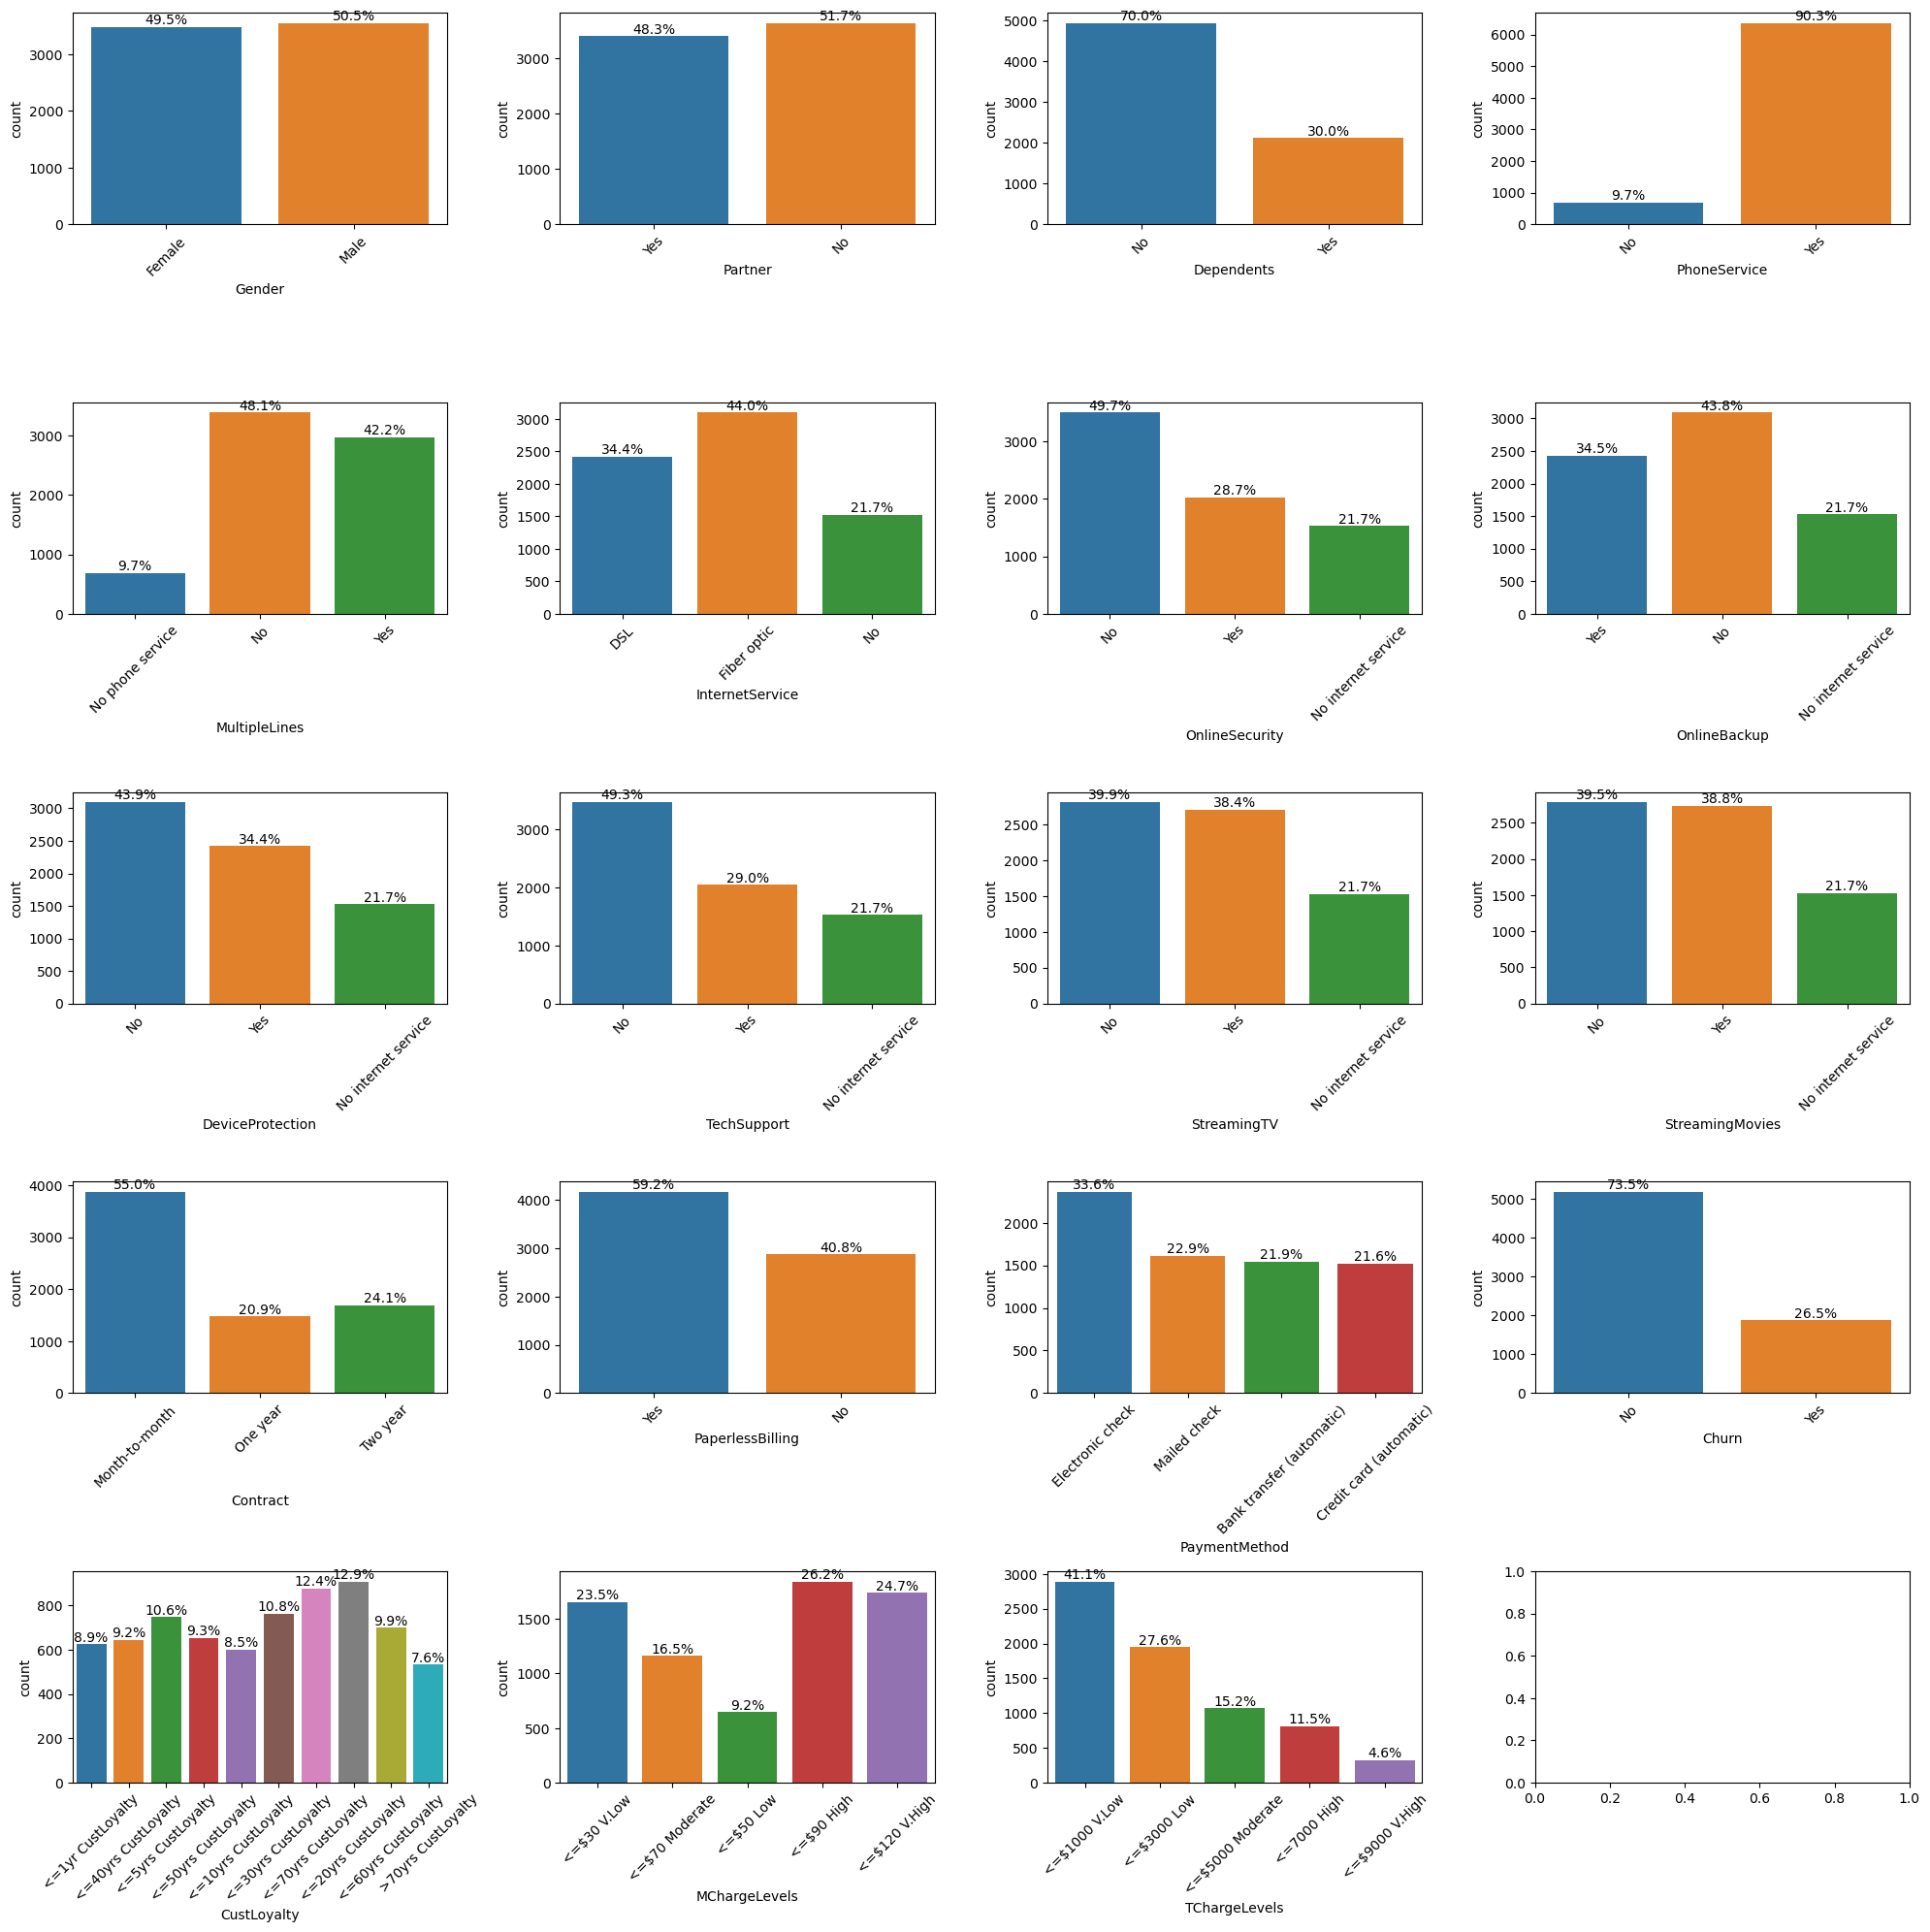

In [25]:
# Univariate Distribution Plots of Categorical Data Features in the Dataset

fig, axes = plt.subplots(round(len(Cat_ft.columns) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(Cat_ft.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sb.countplot(x=Cat_ft.columns[i], data=Cat_ft, ax=ax)
        
        # Add percentage labels on top of the bars
        total = len(Cat_ft)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height / total * 100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom')

fig.tight_layout()
plt.show()

### Observations
With reference to the categorical features in the dataset, the following observations were made:
- **Gender:** The customers of ConnectTel's telecommunication services comprise of 49.5% females and 50.5% males.
- **Partner:** 48.3% of the customers have partners, while 51.7% do not.
- **Dependents:** 70% of the customers have dependents while 30% do not.
- **Phone Service:** 90.3% of the customers have a phone service, while 9.7% do not.
- **Multiple Lines:** 42.2% of the total number of customers have multiple lines, while 48.1% do not.
- **Internet Service:** 34.4% and 44% of the customers are subscibed to the DSL and Fiber optic internet services respectively, while 21.7% are not subscribed to an internet service.
- **Online Security:** 28.7% of the customers have online security, while 49.7% do not.
- **Online Backup:** 34.5% of the customers have online backup services, while 43.8% do not.
- **Device Protection:** 34.4% of the customers have device protection services while 43.9% do not.
- **Tech Support:** 29% of the customers have tech support servies, while 49.3% do not.
- **Steaming TV:** 38.4% of the customers have streaming TV services while 39.9% do not.
- **Streaming Movies:** 38.8% of the customers have streaming movies services while 39.5% do not.
- **Contract:** 55% of the customers have a month-to-month contract, 20.9% have a 1-year contract, and 24.1% have a 2-year contact.
- **Paperless Billing:** 59.2% of the customers have opted for paperless billing, while 40.8% make use of paper billing.
- **Payment Method:** 33.6% of the customers use electronic checks, 22.9% use mailed checks, 21.9% use automatic bank transfers, and 21.6% use automatic credit card transfers.
- **Churn:** 26.5% of the customers have churned, while 73.5% have not.

In [26]:
# Total Number of Customers

Total_data_points = df.shape[0]
print("Total Number of Data Points:", Total_data_points)

Total Number of Data Points: 7043


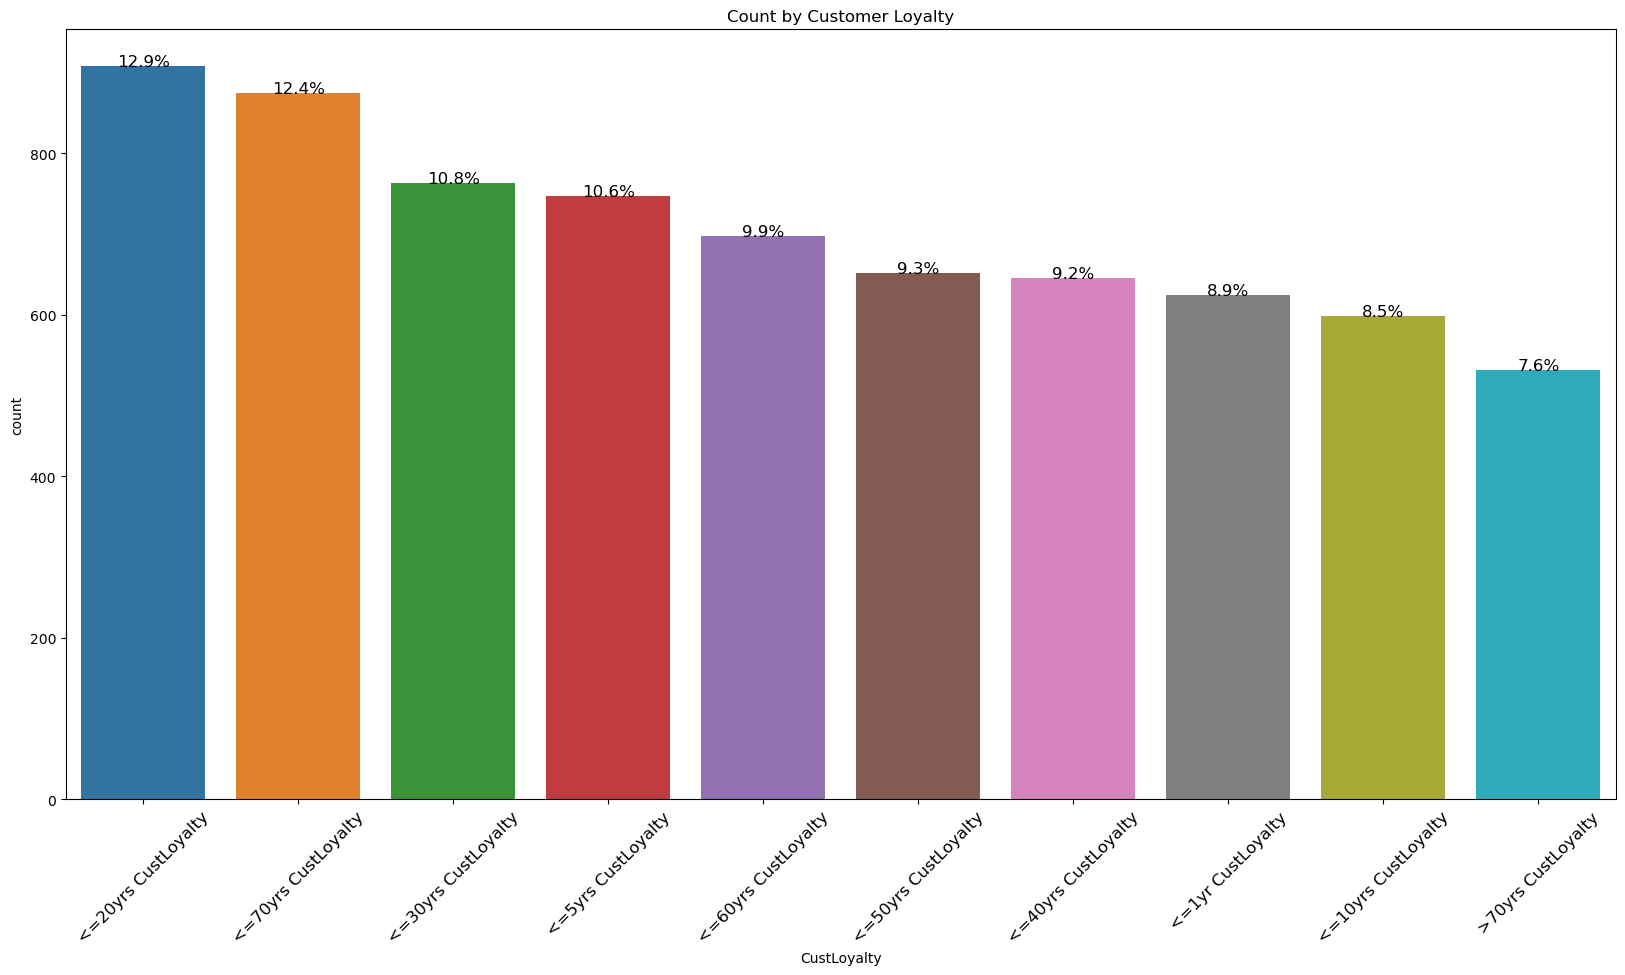

In [27]:
# Distribution of Count by Customer Loyalty

# Create the countplot
plt.figure(figsize=(20,10))
ax = sb.countplot(x=df["CustLoyalty"], order=df["CustLoyalty"].value_counts(ascending=False).index)

# Calculate percentages and annotate the bars
total = len(df["CustLoyalty"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_title("Count by Customer Loyalty")
plt.show()

### Observations
Of the company's total customers, those who have been loyal for less than or equal to 20 years and less than or equal to 70 years constitute an aggregate of 25.3% (12.9% and 12.4% respectively). These two categories have the highest count. Customers who have been loyal for more than 70 years have the lowest count. 

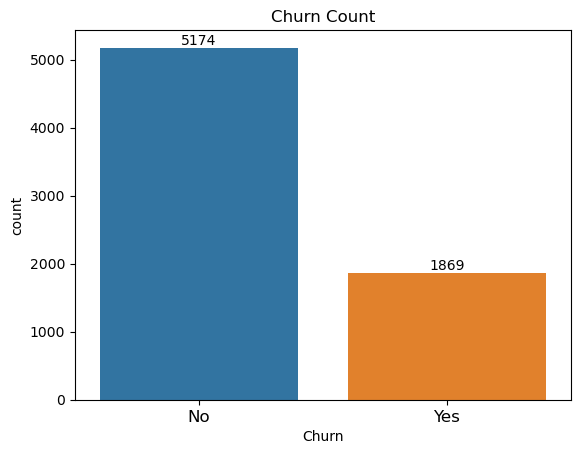

In [28]:
# Distribution of Churn Count (How many customers have Churned?)

ax = sb.countplot(x=df["Churn"], order=df["Churn"].value_counts(ascending=False).index)
values = df["Churn"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_title("Churn Count")
plt.show()

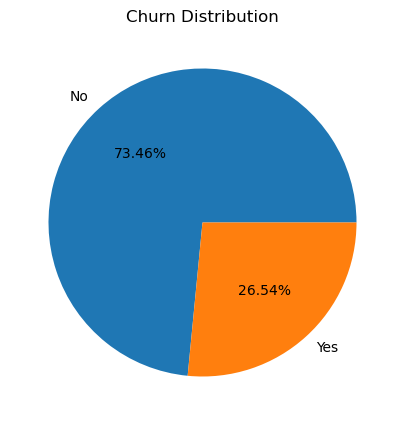

In [29]:
# Visualization of Churn Distribution

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f'{p:.2f}%')
ax.set_title("Churn Distribution", fontsize=12)
plt.show()

### Observation
26.5% of the customers have churned, while 73.5% have not.

## 3.2 Univariate Numerical Data Assessment

In [30]:
Num_ft

SeniorCitizen  Tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85         29.85
1                 0      34           56.95       1889.50
2                 0       2           53.85        108.15
3                 0      45           42.30       1840.75
4                 0       2           70.70        151.65
...             ...     ...             ...           ...
7038              0      24           84.80       1990.50
7039              0      72          103.20       7362.90
7040              0      11           29.60        346.45
7041              1       4           74.40        306.60
7042              0      66          105.65       6844.50

[7043 rows x 4 columns]

In [31]:
# 3.2.1 Detecting Outliers

Num_ft.columns

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

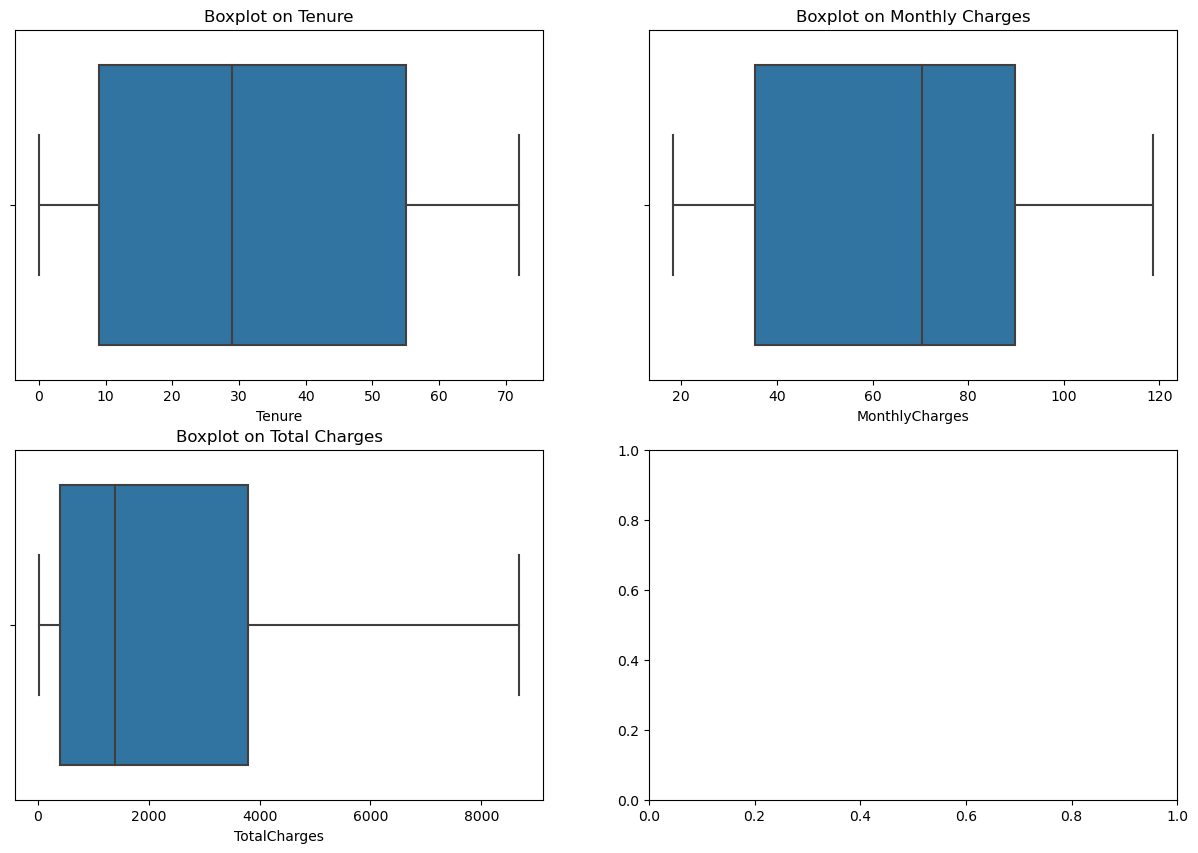

In [32]:
# Visualising Outliers (Boxplot)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sb.boxplot(x="Tenure", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Tenure", fontsize=12);

sb.boxplot(x="MonthlyCharges", data=Num_ft, ax=axs[0,1])
axs[0,1].set_title("Boxplot on Monthly Charges", fontsize=12)

sb.boxplot(x="TotalCharges", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Total Charges", fontsize=12);

### Observations
The numerical data features have no outliers in the data set.

SeniorCitizen
1.8332421986079817


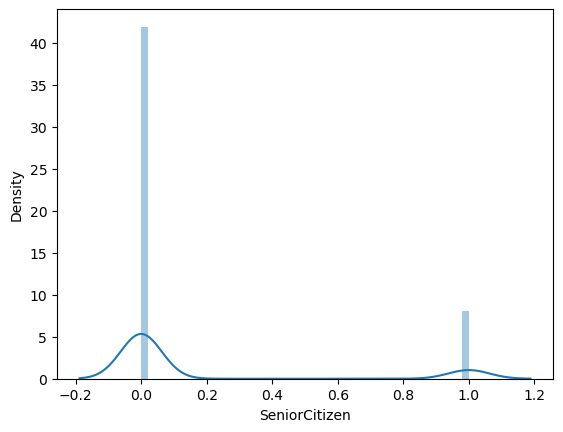

Tenure
0.2394887299846216


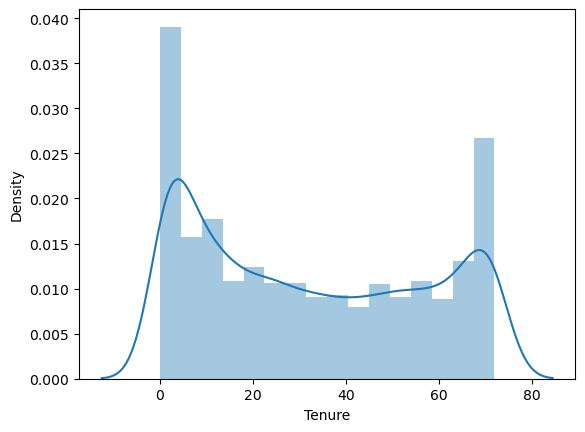

MonthlyCharges
-0.2204774644391769


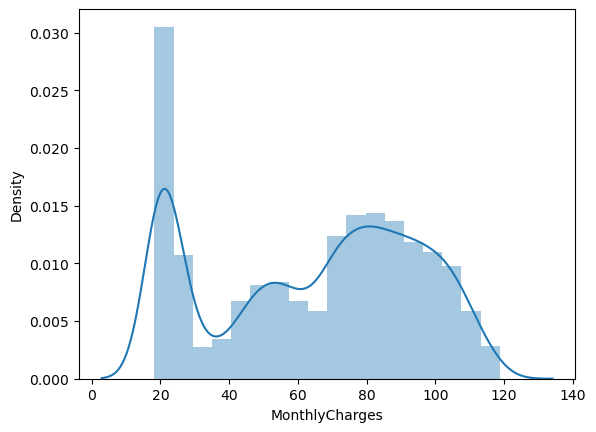

TotalCharges
0.9635838161778828


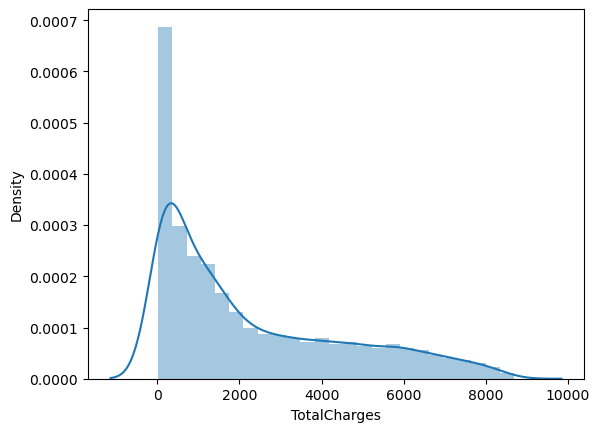

In [33]:
# 3.2.2 Checking for Skewness in Numerical Data Features

from scipy.stats import skew

for col in Num_ft:
    print (col)
    print(skew(Num_ft[col]))
    
    plt.figure()
    sb.distplot(Num_ft[col])
    plt.show()

### Observations
The skewness for "SeniorCitizen" is approximately 1.8, which indicates a positive skew. However, this data feature contains binary data points for categorical classification. This renders its skewness not applicable for numerical data assessment.
For "Tenure", the skewness is 0.2, indicating a positive skew. The skewness for "MonthlyCharges" is approximately -0.2, which indicates a negative skew. That for "TotalCharges" is 0.9, showing a positive skew.

Skew normalization may be required for these three numerical features. However, this will be determined by their respective correlation with the target variable ("Churn").

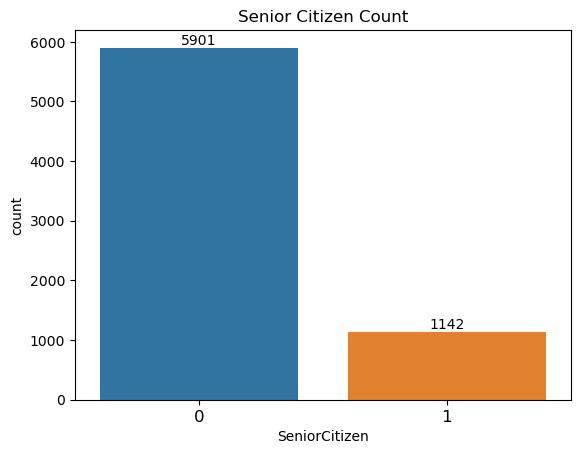

In [34]:
# 3.2.3 Distribution of Senior Citizen Count (How many customers are senior citizens?)

ax = sb.countplot(x=df["SeniorCitizen"], order=df["SeniorCitizen"].value_counts(ascending=False).index)
values = df["SeniorCitizen"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_title("Senior Citizen Count")
plt.show()

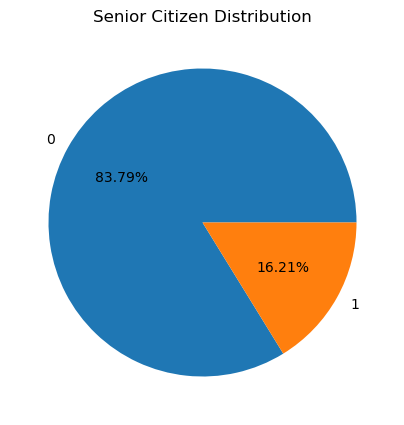

In [35]:
# Visualization of Senior Citizen Distribution

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["SeniorCitizen"])
ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f'{p:.2f}%')
ax.set_title("Senior Citizen Distribution", fontsize=12)
plt.show()

### Observations
16.2% of the customers are senior citizens, while 83.8% are not.

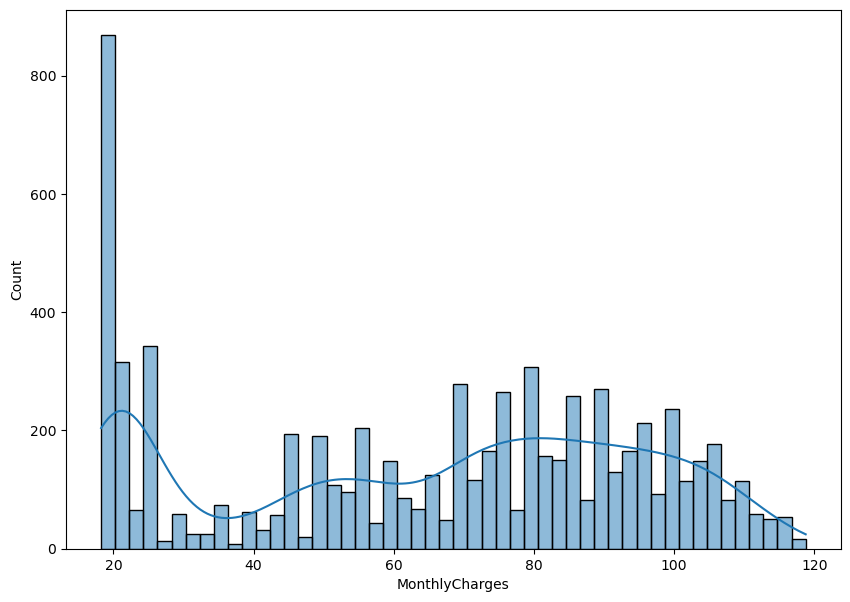

In [36]:
# 3.2.4 Distribution of Monthly Charges Count

plt.figure(figsize=(10,7))
sb.histplot(df['MonthlyCharges'],bins=50, kde=True);

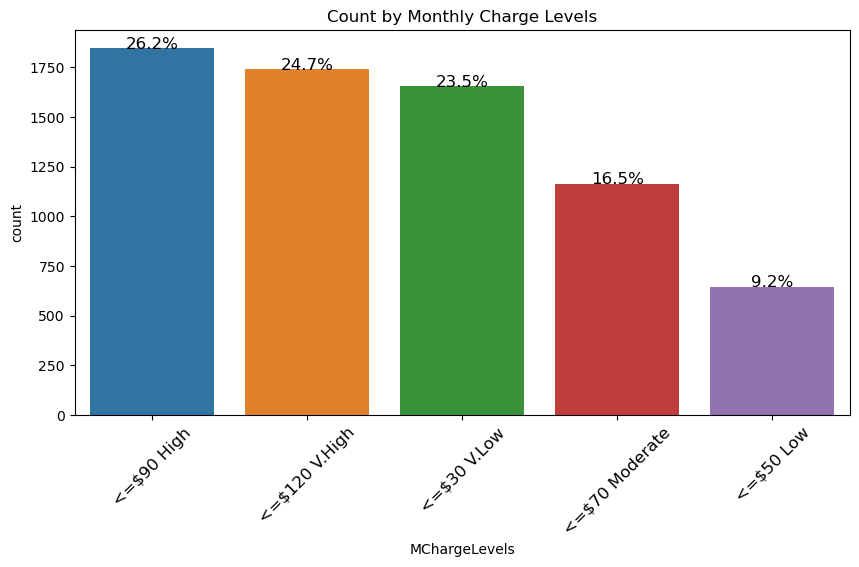

In [37]:
# Distribution of Count by Monthly Charge Levels (How many customers have high, low, or moderate monthly charges?)

# Create the countplot
plt.figure(figsize=(10,5))
ax = sb.countplot(x=df["MChargeLevels"], order=df["MChargeLevels"].value_counts(ascending=False).index)

# Calculate percentages and annotate the bars
total = len(df["MChargeLevels"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_title("Count by Monthly Charge Levels")
plt.show()

### Observations
With respect to customers' monthly charge levels, the highest number of customers (26.2%) pay a high monthly charge (<=90 dollars). The second largest group of customers (24.7%) pay a very high monthly charge (<=120 dollars). Customers in the very low monthly charge category, constitute the third largest group (23.5%). Those in the moderate monthly charge category make up 16.5%. The group of customers with the lowest count (9.2%) fall under the low monthly charge category. 

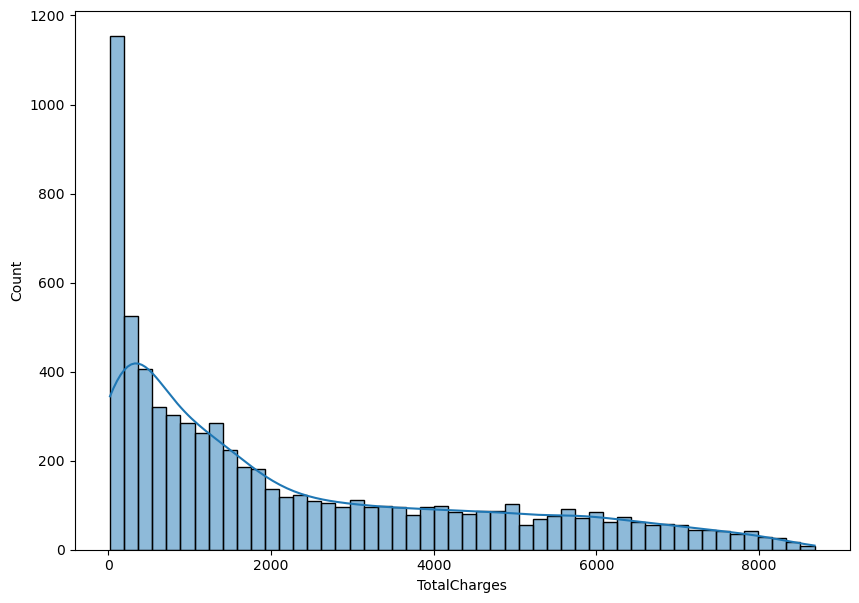

In [38]:
# 3.2.5 Distribution of Total Charges Count

plt.figure(figsize=(10,7))
sb.histplot(df['TotalCharges'],bins=50, kde=True);

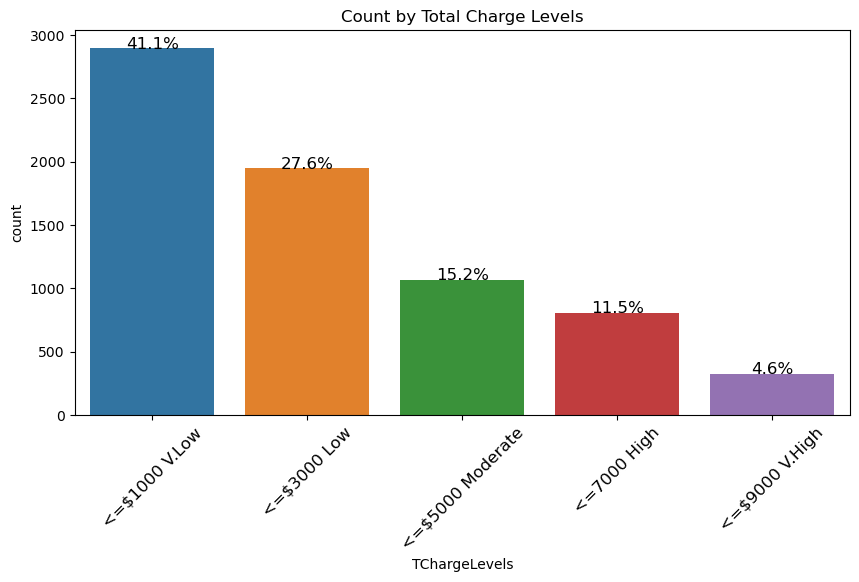

In [39]:
# Distribution of Count by Total Charge Levels (How many customers have high, low, or moderate total charges?)

# Create the countplot
plt.figure(figsize=(10,5))
ax = sb.countplot(x=df["TChargeLevels"], order=df["TChargeLevels"].value_counts(ascending=False).index)

# Calculate percentages and annotate the bars
total = len(df["TChargeLevels"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_title("Count by Total Charge Levels")
plt.show()

### Observations
For customers' total charge levels, the highest number of customers (41.1%) pay a very low total charge (<=1,000 dollars). The second largest group of customers (27.6%) pay a low total charge of <=3,000 dollars. Customers in the moderate total charge category, make up the third largest group (15.2%). Those in the high total charge category make up 11.5%. The group of customers with the lowest count (4.6%) fall under the very high total charge category.

## 4. Bivariate Analysis

In [40]:
# Separating Categorical Features from Numerical Features 
# (Note: Repeated process after additional categorical features were created after the 1st separation operation)

Num_ft = df.select_dtypes(include = ['float64', 'int64'])
Cat_ft = df.select_dtypes(include='object')

## 4.1 Bivariate Categorical Data Assessment

In [41]:
Cat_ft.columns

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'CustLoyalty',
       'MChargeLevels', 'TChargeLevels'],
      dtype='object')

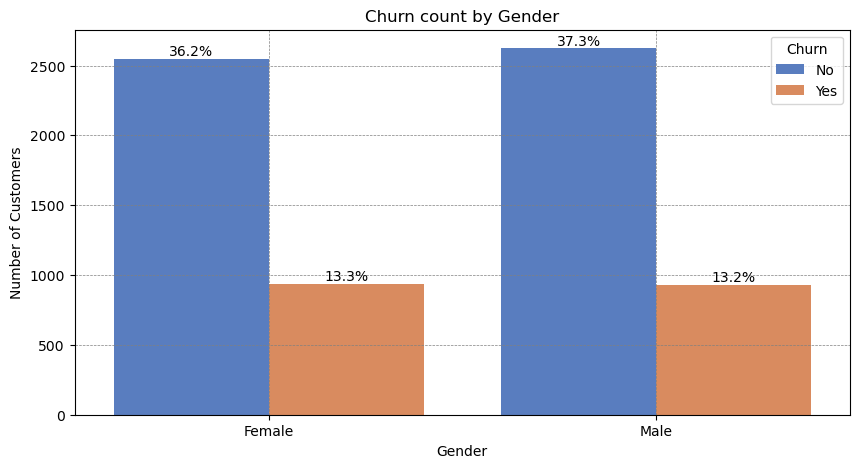

In [42]:
# 4.1.1 Visualization of Churn by Gender

sb.color_palette("hls", 8)
plt.figure(figsize = (10,5))
ax = sb.countplot(x='Gender', data=df, hue='Churn', palette='muted')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Churn count by Gender')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

### Observations
The percentage of churned customers is not affected by gender, as there is no significant difference in the number of churned males and females.

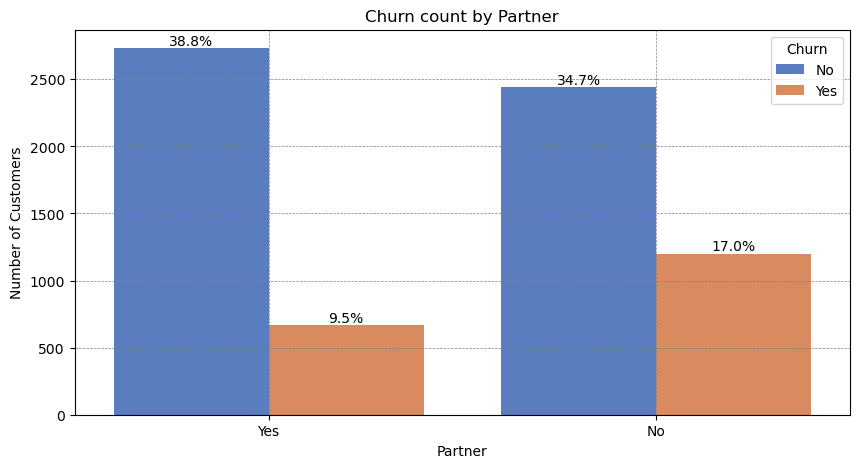

In [43]:
# 4.1.2 Visualization of Churn by Partner

plt.figure(figsize = (10,5))
ax = sb.countplot(x='Partner', data=df, hue='Churn', palette='muted')
plt.xlabel('Partner')
plt.ylabel('Number of Customers')
plt.title('Churn count by Partner')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

### Observations
The number of customers with no partners have a higher percentage of churn (17%), as opposed to 9.5% for churned customers who have partners. This implies that having a partner may influence the probability of a customer to churn.

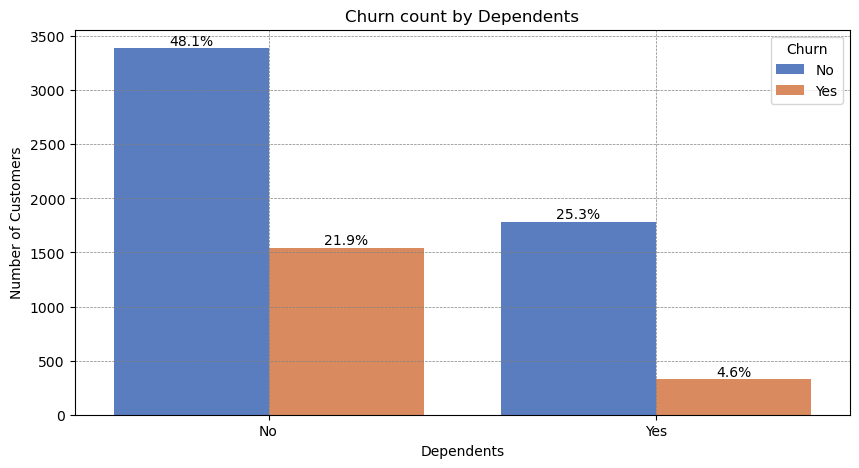

In [44]:
# 4.1.3 Visualization of Churn by Dependents

plt.figure(figsize = (10,5))
ax = sb.countplot(x='Dependents', data=df, hue='Churn', palette='muted')
plt.xlabel('Dependents')
plt.ylabel('Number of Customers')
plt.title('Churn count by Dependents')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
The number of churned customers who do not have dependents is higher than that of churned customers who have dependents. 21.9% as against 4.6% respectively. This indicates a correlation between 'Churn' and 'Dependents'. 

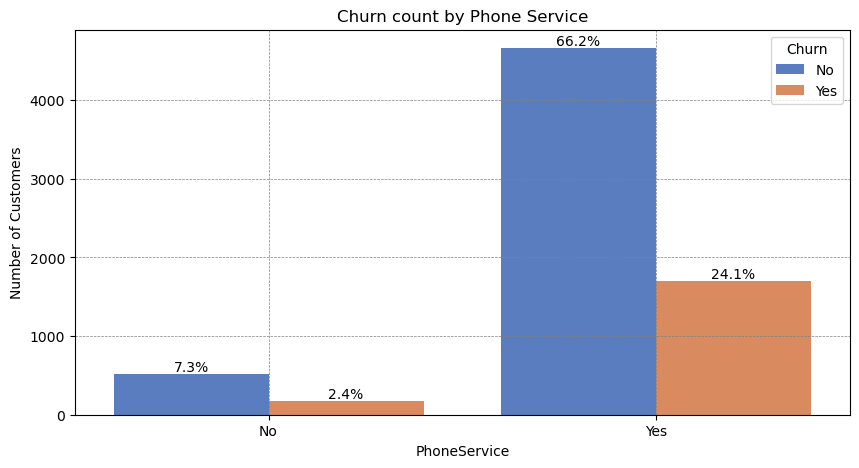

In [45]:
# 4.1.4 Visualization of Churn by Phone Service

plt.figure(figsize = (10,5))
ax = sb.countplot(x='PhoneService', data=df, hue='Churn', palette='muted')
plt.xlabel('PhoneService')
plt.ylabel('Number of Customers')
plt.title('Churn count by Phone Service')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers who have a phone service have churned more than those who do not. 

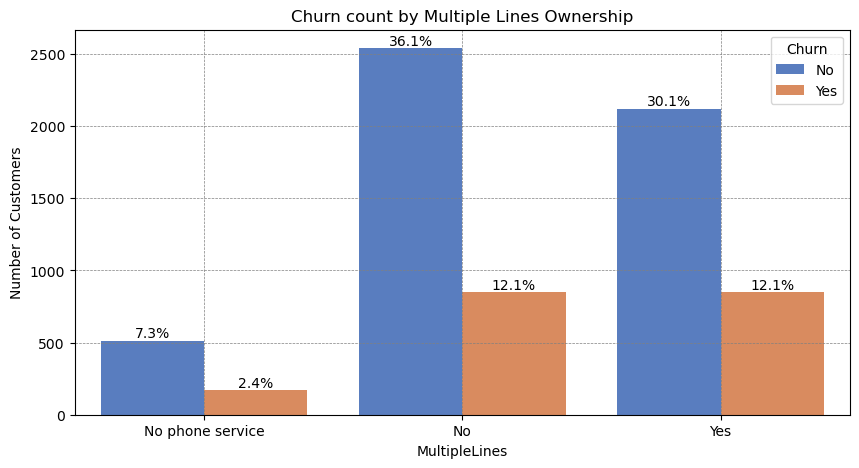

In [46]:
# 4.1.5 Visualization of Churn by Multiple Lines

plt.figure(figsize = (10,5))
ax = sb.countplot(x='MultipleLines', data=df, hue='Churn', palette='muted')
plt.xlabel('MultipleLines')
plt.ylabel('Number of Customers')
plt.title('Churn count by Multiple Lines Ownership')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
The percentage of churn is equal for customers with and without multiple lines. This means there is little or no correlation between 'MultipleLines' and 'Churn'.

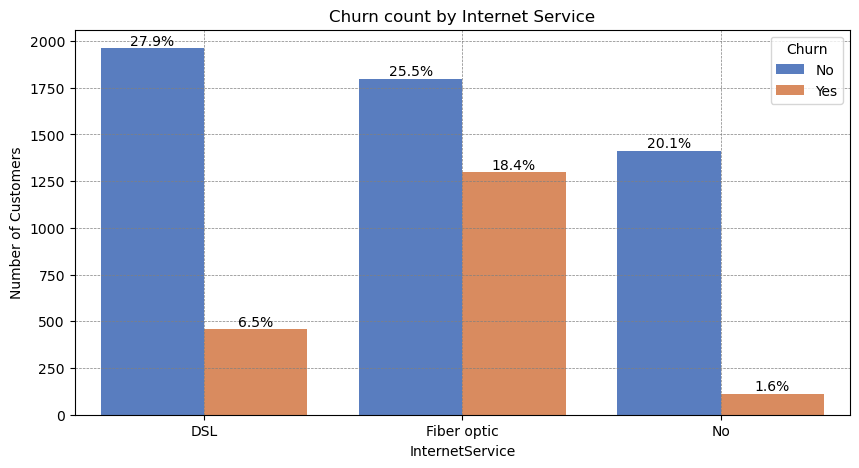

In [47]:
# 4.1.6 Visualization of Churn by Internet Service

plt.figure(figsize = (10,5))
ax = sb.countplot(x='InternetService', data=df, hue='Churn', palette='muted')
plt.xlabel('InternetService')
plt.ylabel('Number of Customers')
plt.title('Churn count by Internet Service')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
The percentage of churn is higher for customers with fiber optic internet service (18.4%) as compared to those with DSL internet services (6.5%). This some correlation between 'InternetService' and 'Churn'.

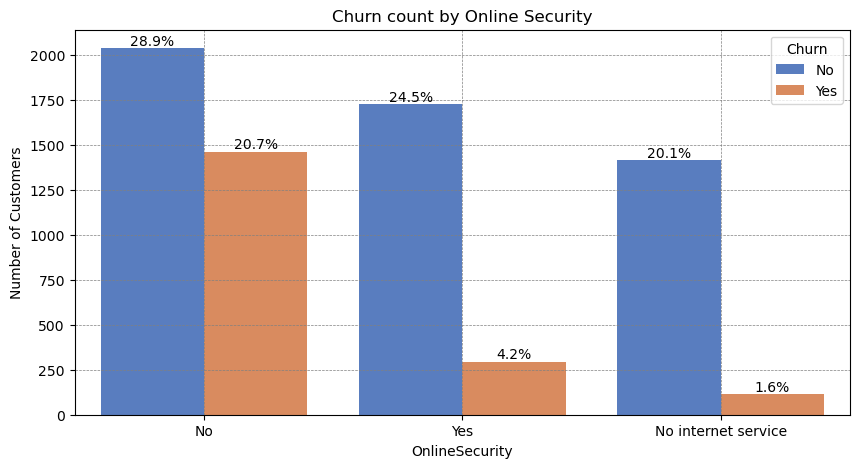

In [48]:
# 4.1.7 Visualization of Churn by Online Security

plt.figure(figsize = (10,5))
ax = sb.countplot(x='OnlineSecurity', data=df, hue='Churn', palette='muted')
plt.xlabel('OnlineSecurity')
plt.ylabel('Number of Customers')
plt.title('Churn count by Online Security')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers with no online security have churned more than those with online security.

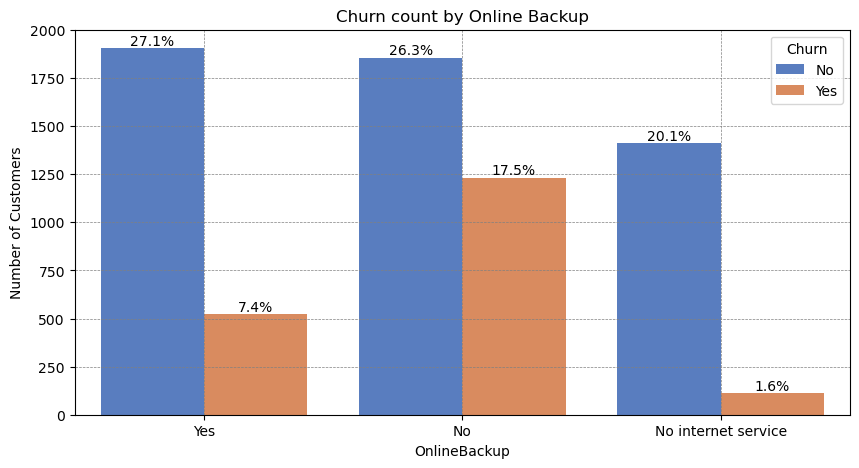

In [49]:
# 4.1.8 Visualization of Churn by Online Backup

plt.figure(figsize = (10,5))
ax = sb.countplot(x='OnlineBackup', data=df, hue='Churn', palette='muted')
plt.xlabel('OnlineBackup')
plt.ylabel('Number of Customers')
plt.title('Churn count by Online Backup')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers with no online backup have churned more than those with no online backup.

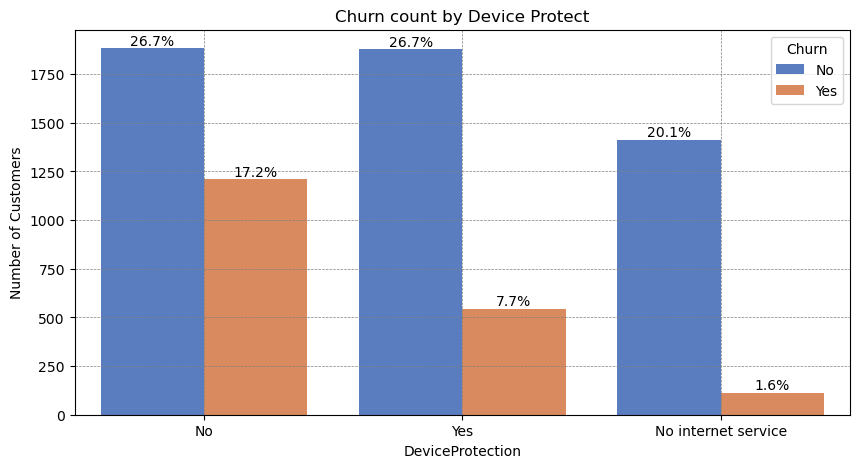

In [50]:
# 4.1.9 Visualization of Churn by Device Protection

plt.figure(figsize = (10,5))
ax = sb.countplot(x='DeviceProtection', data=df, hue='Churn', palette='muted')
plt.xlabel('DeviceProtection')
plt.ylabel('Number of Customers')
plt.title('Churn count by Device Protect')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers with no device protection have churned more than those with no device protection.

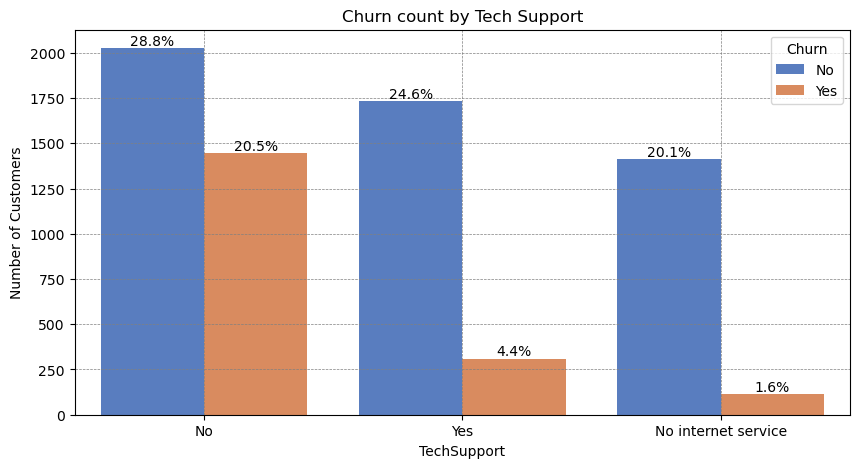

In [51]:
# 4.1.10 Visualization of Churn by Tech Support

plt.figure(figsize = (10,5))
ax = sb.countplot(x='TechSupport', data=df, hue='Churn', palette='muted')
plt.xlabel('TechSupport')
plt.ylabel('Number of Customers')
plt.title('Churn count by Tech Support')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers with no tech support have churned more than those with tech support.

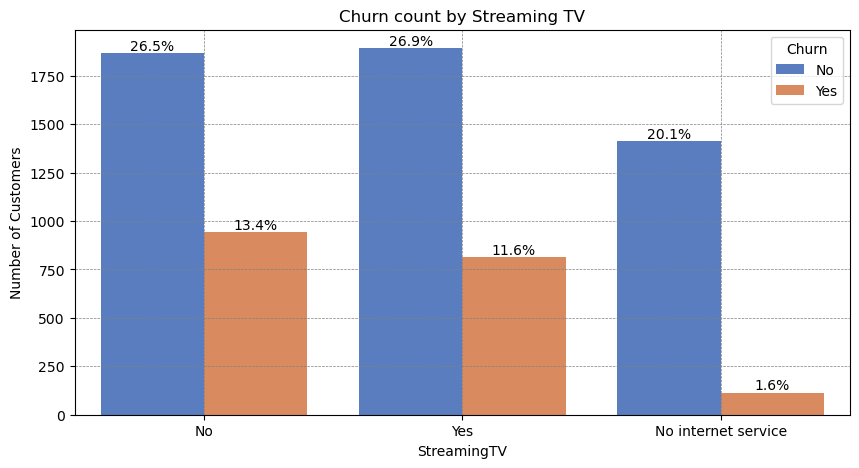

In [52]:
# 4.1.11 Visualization of Churn by Streaming TV

plt.figure(figsize = (10,5))
ax = sb.countplot(x='StreamingTV', data=df, hue='Churn', palette='muted')
plt.xlabel('StreamingTV')
plt.ylabel('Number of Customers')
plt.title('Churn count by Streaming TV')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers with no streaming TV service have churned more than those subscribed to the streaming TV service.

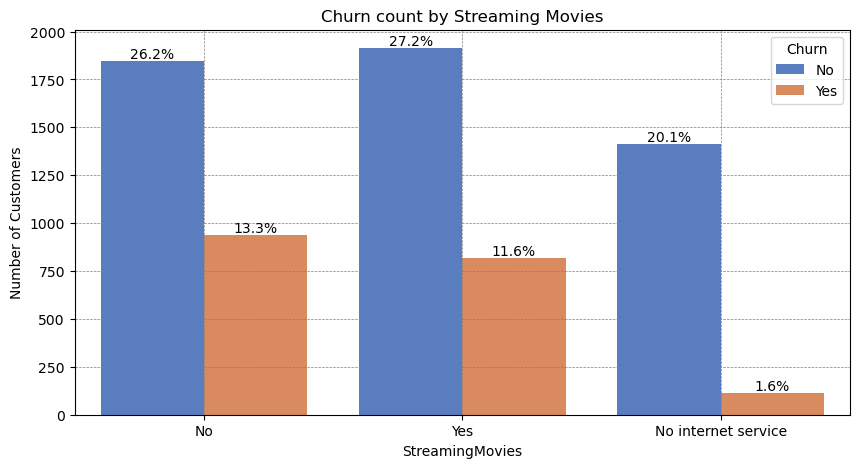

In [53]:
# 4.1.12 Visualization of Churn by Streaming Movies

plt.figure(figsize = (10,5))
ax = sb.countplot(x='StreamingMovies', data=df, hue='Churn', palette='muted')
plt.xlabel('StreamingMovies')
plt.ylabel('Number of Customers')
plt.title('Churn count by Streaming Movies')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers with no streaming movies service have churned more than those subscribed to the streaming movies service.



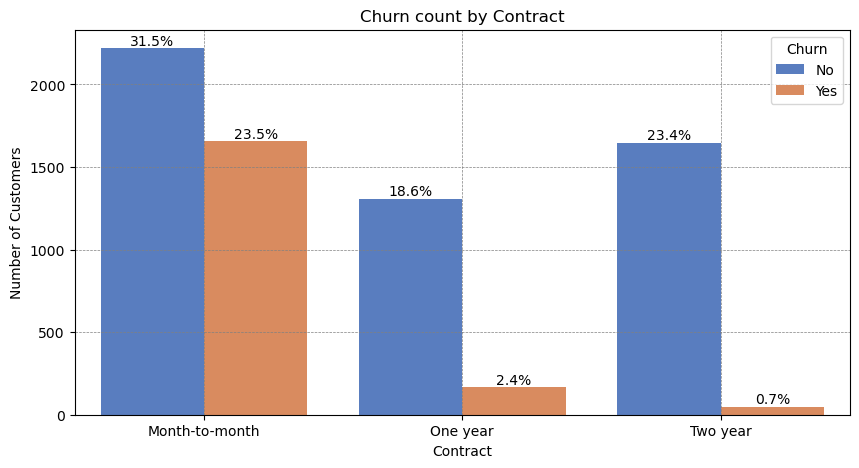

In [54]:
# 4.1.13 Visualization of Churn by Contract

plt.figure(figsize = (10,5))
ax = sb.countplot(x='Contract', data=df, hue='Churn', palette='muted')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.title('Churn count by Contract')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers on a monthly contract have the highest churn percentage.

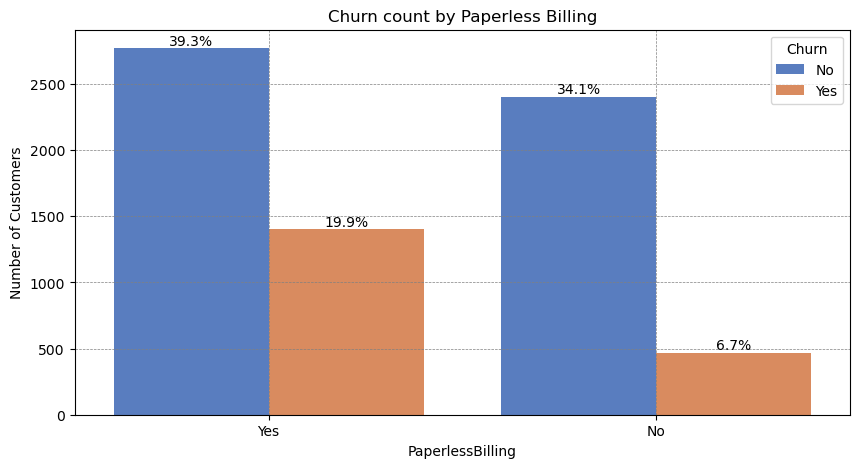

In [55]:
# 4.1.14 Visualization of Churn by Paperless Billing

plt.figure(figsize = (10,5))
ax = sb.countplot(x='PaperlessBilling', data=df, hue='Churn', palette='muted')
plt.xlabel('PaperlessBilling')
plt.ylabel('Number of Customers')
plt.title('Churn count by Paperless Billing')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers who use paperless billing have churned more.

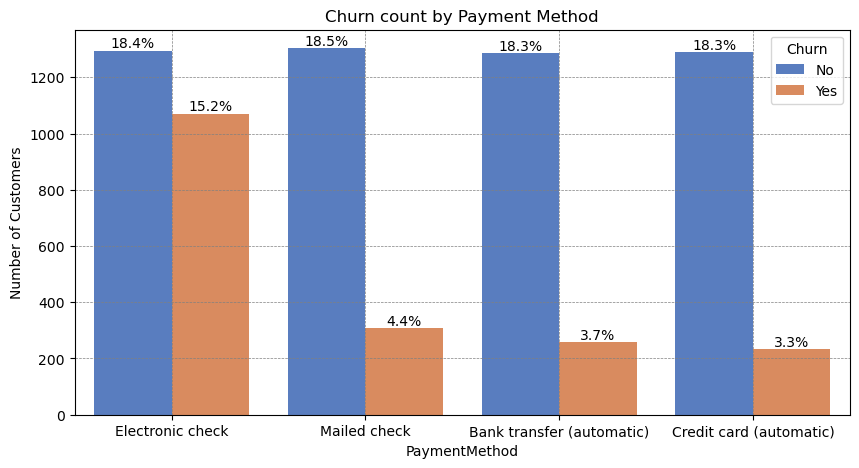

In [56]:
# 4.1.15 Visualization of Churn by Payment Method

plt.figure(figsize = (10,5))
ax = sb.countplot(x='PaymentMethod', data=df, hue='Churn', palette='muted')
plt.xlabel('PaymentMethod')
plt.ylabel('Number of Customers')
plt.title('Churn count by Payment Method')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers who utilize electronic checks as payment method have churned more than those in the other payment method categories.

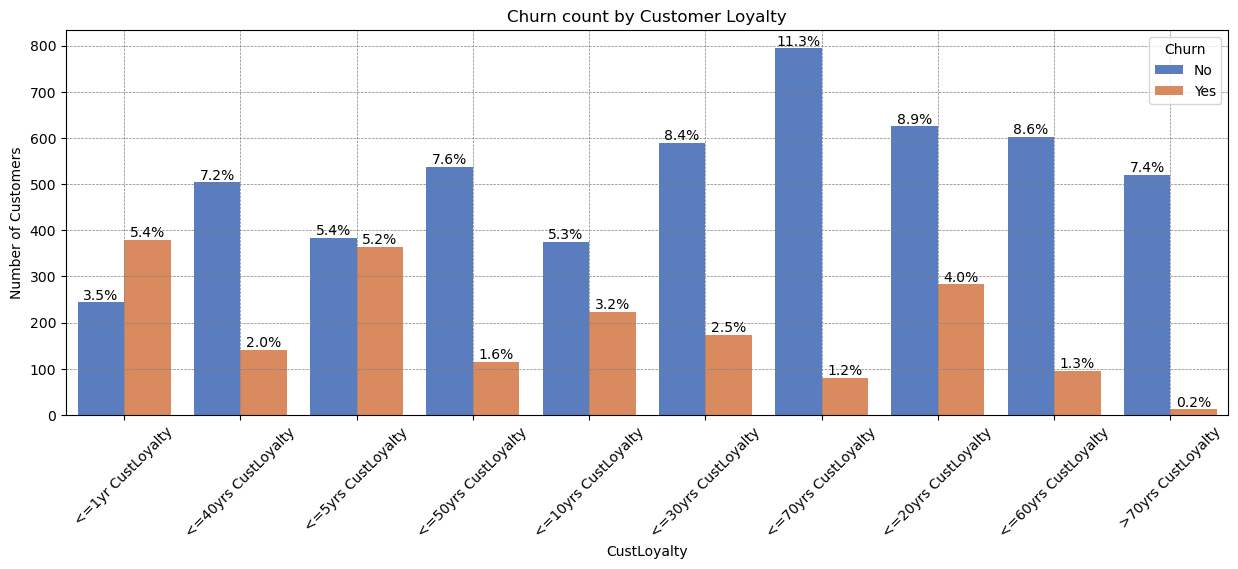

In [57]:
# 4.1.16 Visualization of Churn by Customer Loyalty

plt.figure(figsize = (15,5))
ax = sb.countplot(x='CustLoyalty', data=df, hue='Churn', palette='muted')
plt.xlabel('CustLoyalty')
plt.ylabel('Number of Customers')
plt.title('Churn count by Customer Loyalty')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Rotate the x-axis labels vertically
plt.xticks(rotation=45)
plt.show();

###  Observations
Customers with the highest churn percentages of 5.4% and 5.2% fall under the categories of <= 1year and <= 5 years respectively. Another category with a high churn percentage in comparison to the rest, is that with <= 20 years subscribers.

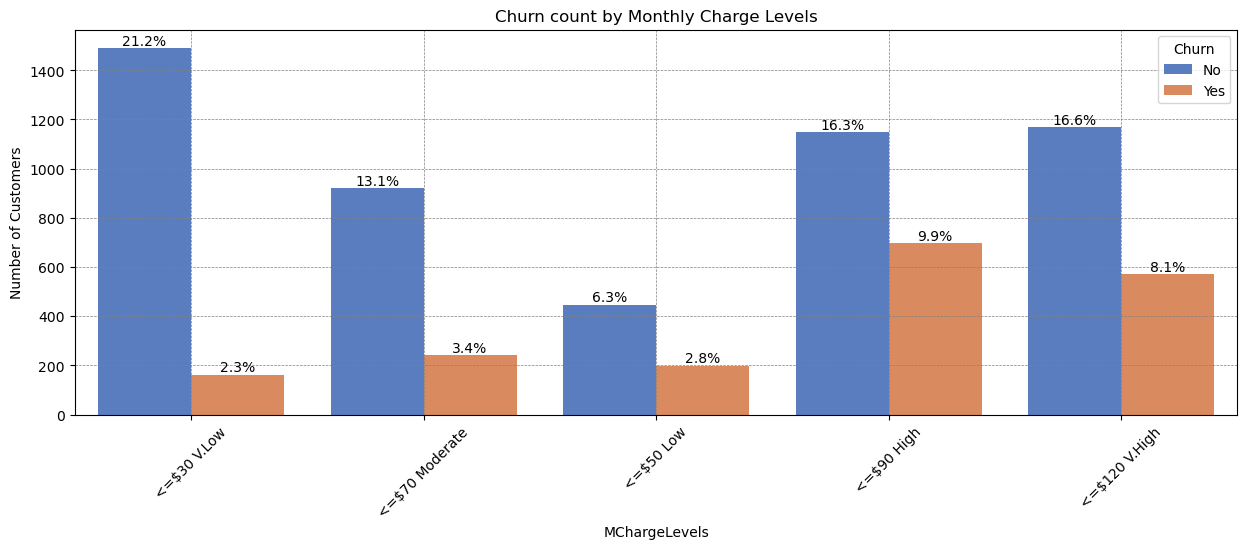

In [58]:
# 4.1.17 Visualization of Churn by Monthly Charge Levels

plt.figure(figsize = (15,5))
ax = sb.countplot(x='MChargeLevels', data=df, hue='Churn', palette='muted')
plt.xlabel('MChargeLevels')
plt.ylabel('Number of Customers')
plt.title('Churn count by Monthly Charge Levels')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Rotate the x-axis labels vertically
plt.xticks(rotation=45)
plt.show();

###  Observations
Customers with the highest churn percentages of 9.9% and 8.1% fall under the high and very high monthly charge categories respectively. This indicates a correlation between monthly charges and churn.

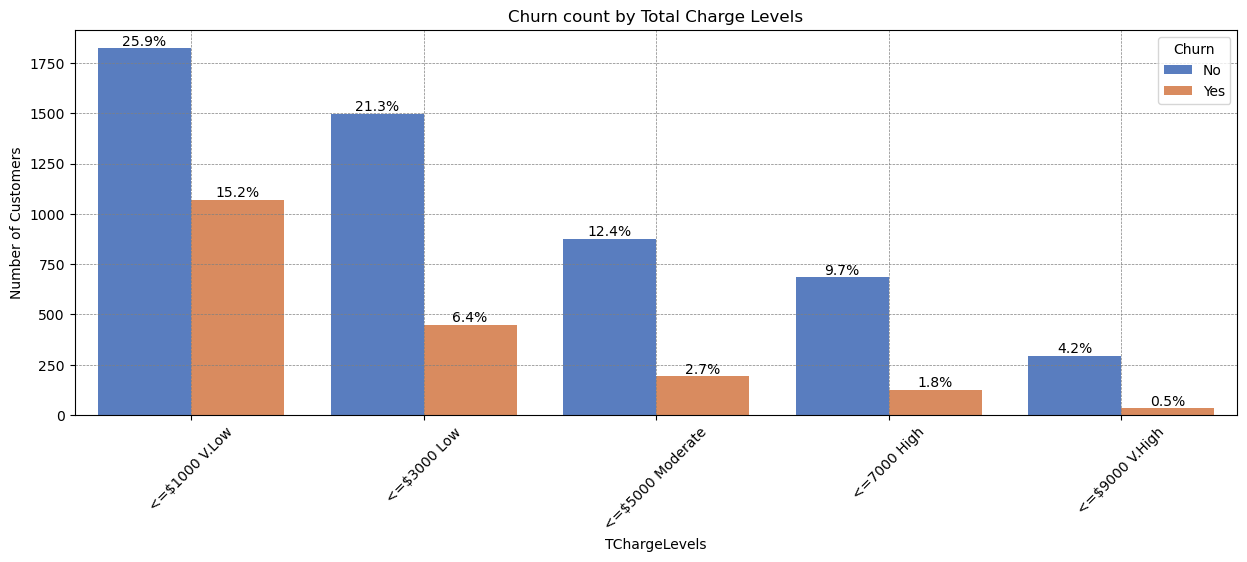

In [59]:
# 4.1.18 Visualization of Churn by Total Charge Levels

plt.figure(figsize = (15,5))
ax = sb.countplot(x='TChargeLevels', data=df, hue='Churn', palette='muted')
plt.xlabel('TChargeLevels')
plt.ylabel('Number of Customers')
plt.title('Churn count by Total Charge Levels')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Rotate the x-axis labels vertically
plt.xticks(rotation=45)
plt.show();

###  Observations
In the case of total charges, the highest churn count (15.2%) is for customers in the very low total charge category.
The distribution reveals a negative correlation between churn count and total charge levels.

## 4.2 Bivariate Numerical Data Assessment

In [60]:
Num_ft.columns

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

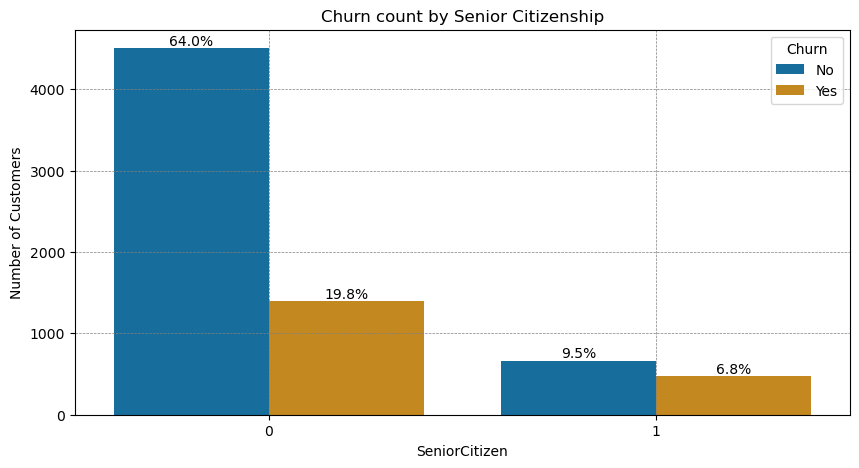

In [61]:
# 4.2.1 Visualization of Churn by Senior Citizen

plt.figure(figsize = (10,5))
ax = sb.countplot(x='SeniorCitizen', data=df, hue='Churn', palette='colorblind')
plt.xlabel('SeniorCitizen')
plt.ylabel('Number of Customers')
plt.title('Churn count by Senior Citizenship')

# Calculate the percentage of each category
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_counts:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
# Add a gray grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show();

###  Observations
Customers who are not senior citizens have a higher churn count than those who are.

## 5. Multivariate Analysis

In [62]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'CustLoyalty',
       'MChargeLevels', 'TChargeLevels'],
      dtype='object')

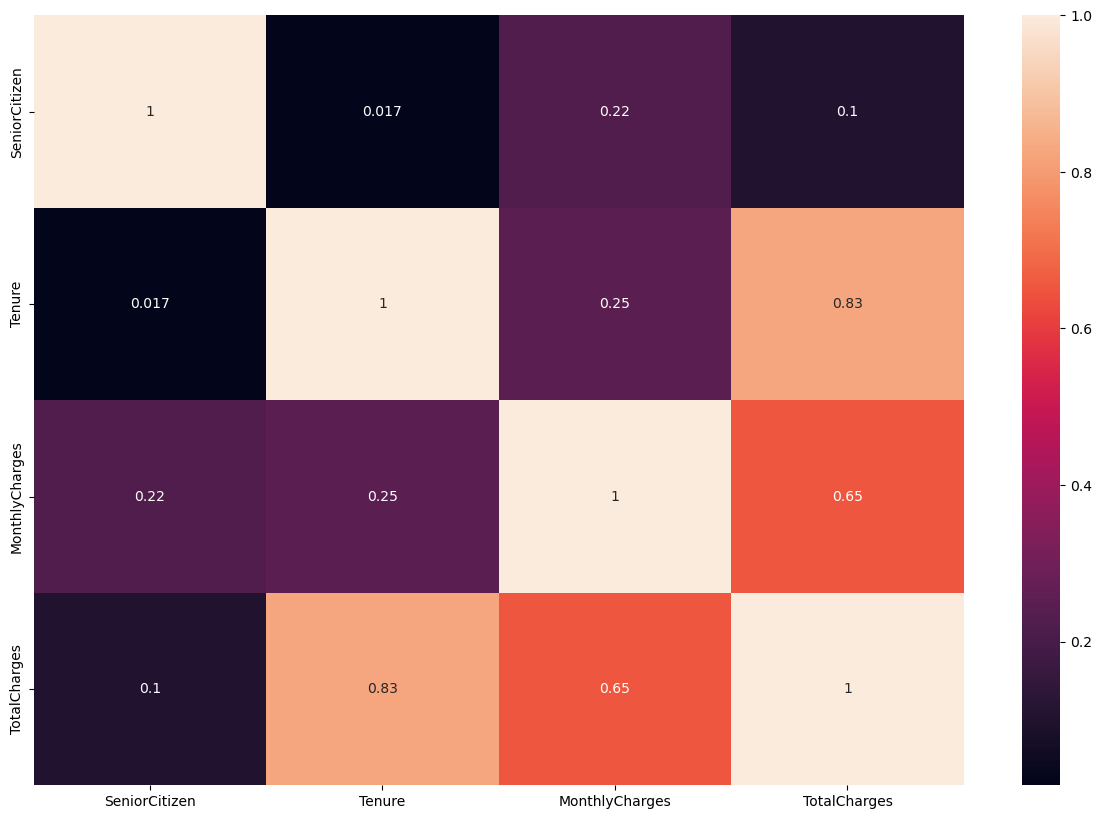

In [63]:
# 5.1 Correlation between the numerical variables.

plt.subplots(figsize = (15,10))
corr = df.corr()
sb.heatmap(corr, annot=True);

###  Observations
The correlation matrix shows that there is a strong positive correlation between a customer's total charge and their tenure of subscription to the company's services. Likewise, there is also a strong positive correlation between customers' total charges and their monthly charges.

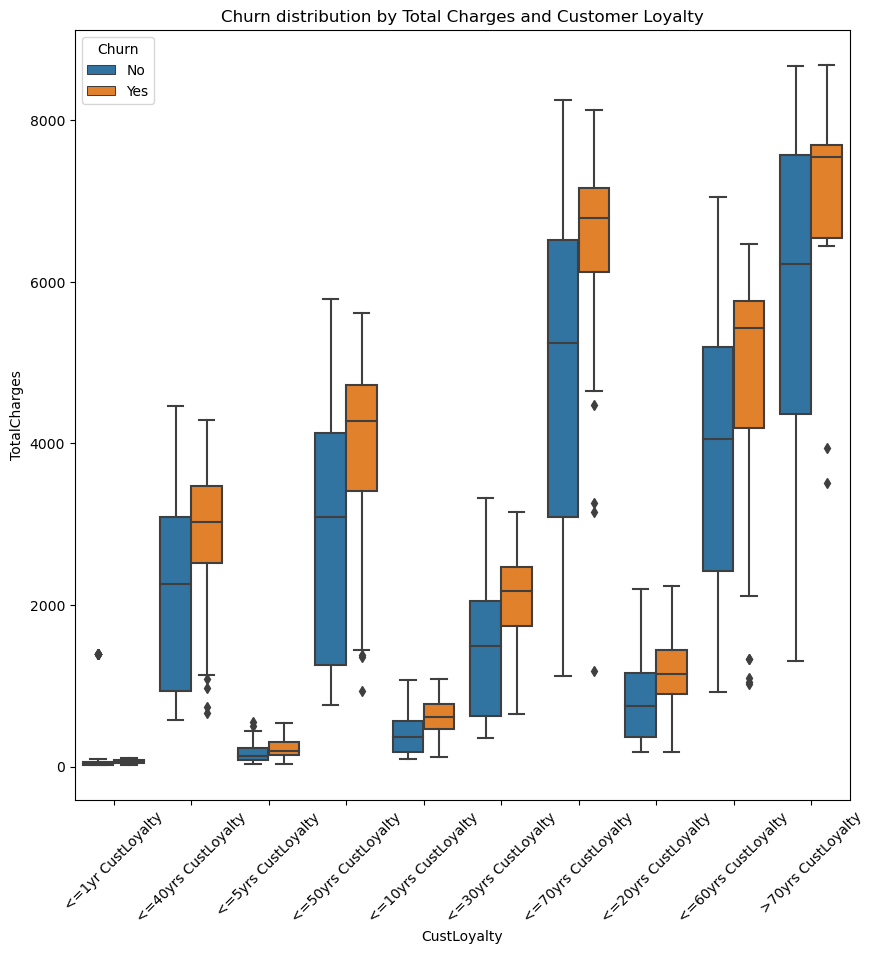

In [64]:
# 5.2 Multivariate distribution of Churn by Total Charges and Tenure
# This is to illustrate how the total charges varry based on customers' tenure 
# and whether they churned or not.

plt.figure(figsize = (10,10))
sb.boxplot(y='TotalCharges',x='CustLoyalty',hue='Churn',data=df)
plt.title('Churn distribution by Total Charges and Customer Loyalty')
plt.xticks(rotation=45);

###  Observations
From the boxplot distribution, that the median value is generally higher for customers who churned across all customer loyalty categories. This implies that customers who churned generally have a higher median total charge across the loyalty categories. This may provide insight relative to reviewing the company's price tarriffs. There are also more outliers where applicable, in the distribution of customers who churned across the various customer loyalty categories. This implies that some customers churned due to other factors apart from total charges.

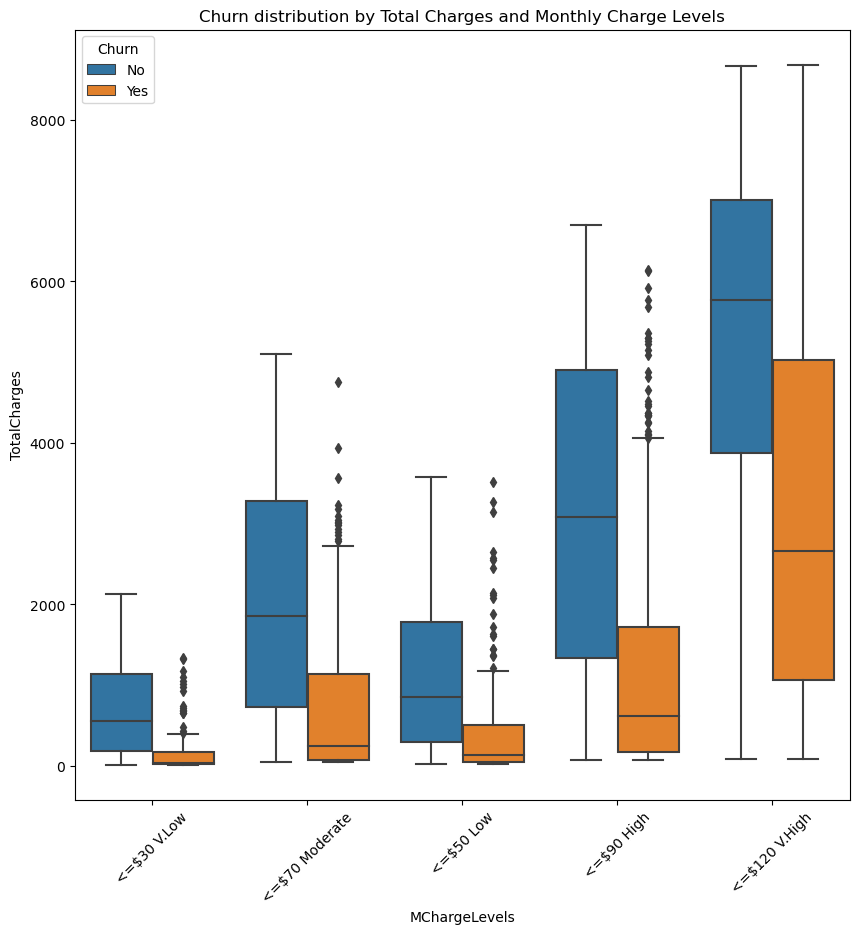

In [65]:
# 5.3 Multivariate distribution of Churn by Total Charges and Monthly Charges
# This is to illustrate how the total charges varry based on customers' monthly charge 
# and whether they churned or not.

plt.figure(figsize = (10,10))
sb.boxplot(y='TotalCharges',x='MChargeLevels',hue='Churn',data=df)
plt.title('Churn distribution by Total Charges and Monthly Charge Levels')
plt.xticks(rotation=45);

###  Observations
The boxplot graph shows that customers who churned have a lower median monthly charge compared to those who have not. This may imply some discrepancy in the calculation of their total charge, because the customers who churned actually have a higher median total charge as seen from the boxplot distribution on churn  by total charges and customer loyalty. The company should revise the total charge calculation method, in comparison to the monthly charge calculation for their customers.

# Question 3: Feature Engineering

## 1. Data Preprocessing

In [66]:
# 1.1 Handling Missing Values

#df.isna().sum()

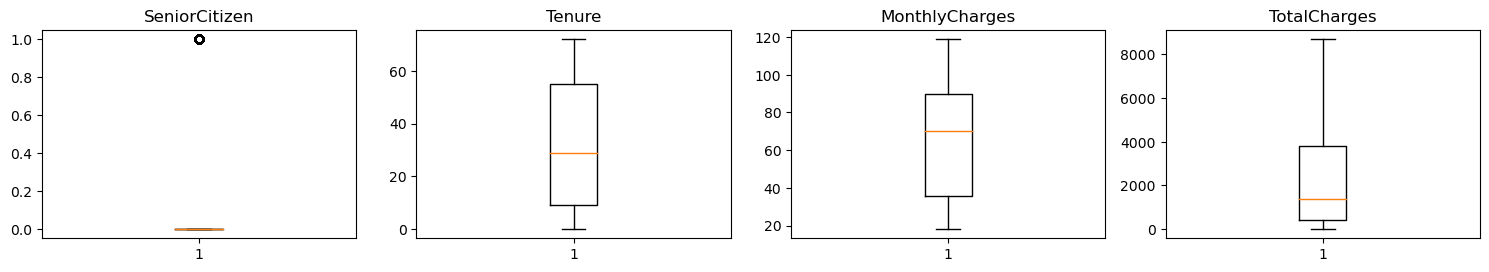

In [67]:
# 1.2 Outlier Detection and Plotting

plt.figure(figsize=(15,10))
for x,v in enumerate(Num_ft):
    plt.subplot(4,4, x+1)
    plt.boxplot(Num_ft[v], whis=1.5)
    plt.title(v)
plt.tight_layout()
plt.show();

In [68]:
# 1.3 Segmenting Input and Output Variables in the Dataset

df_Input = df[['Gender','SeniorCitizen','Partner','Dependents','Tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

df_Output = df[['Churn']]

## 2. Categorical Feature Encoding (for the Input Variables)

In [69]:
# Identification of  Binary, Ordinal and Nominal Categorical Input Features in the Dataset

# Binary Features: 'Gender','Partner','Dependents','PhoneService','PaperlessBilling'

# Ordinal Features: 'Contract'

# Nominal Features: 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
#                    'TechSupport','StreamingTV','StreamingMovies','PaymentMethod'

## 2.1 Encoding Binary Input Features

In [70]:
# Applying the Pandas Replace Technique

df_Input['Gender'] = df_Input['Gender'].replace({'Male': 1, 'Female': 0})
df_Input['Partner'] = df_Input['Partner'].replace({'Yes': 1, 'No': 0})
df_Input['Dependents'] = df_Input['Dependents'].replace({'Yes': 1, 'No': 0})
df_Input['PhoneService'] = df_Input['PhoneService'].replace({'Yes': 1, 'No': 0})
df_Input['PaperlessBilling'] = df_Input['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

## 2.2 Encoding Ordinal Features

In [71]:
# Applying the Ordinal Mapping Technique

ordinal_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
df_Input['Contract'] = df_Input['Contract'].map(ordinal_mapping)

## 2.3 Encoding Nominal Features

### 2.3.1 Applying the One-Hot Encoding Technique to the 'MultipleLines' Feature
(Creation of Numpy Arrays)

In [72]:
ohe = OneHotEncoder(sparse=False)
ML_Enc = ohe.fit_transform(df_Input[['MultipleLines']])
#ML_Enc

In [73]:
#ohe.categories_

In [74]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp1 = pd.DataFrame(ML_Enc,columns=["MultipleLines_"+str(int(i+1)) for i in range(len(df_Input.MultipleLines.unique()))])
#df_Inp1

In [75]:
# Duplicating the Input Variables Data Frame

df_InpDup = df_Input.copy()
#df_InpDup

In [76]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup1 = pd.concat([df_Inp1,df_InpDup],axis=1)
#df_InpDup1.head()

### 2.3.2 Applying the One-Hot Encoding Technique to the 'InternetService' Feature

In [77]:
IS_Enc = ohe.fit_transform(df_Input[['InternetService']])
#IS_Enc

In [78]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp2 = pd.DataFrame(IS_Enc,columns=["InternetService_"+str(int(i+1)) for i in range(len(df_Input.InternetService.unique()))])
#df_Inp2

In [79]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup2 = pd.concat([df_Inp2,df_InpDup1],axis=1)
#df_InpDup2.head()

### 2.3.3 Applying the One-Hot Encoding Technique to the 'OnlineSecurity' Feature

In [80]:
OS_Enc = ohe.fit_transform(df_Input[['OnlineSecurity']])
#OS_Enc

In [81]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp3 = pd.DataFrame(OS_Enc,columns=["OnlineSecurity_"+str(int(i+1)) for i in range(len(df_Input.OnlineSecurity.unique()))])
#df_Inp3

In [82]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup3 = pd.concat([df_Inp3,df_InpDup2],axis=1)
#df_InpDup3.head()

### 2.3.4 Applying the One-Hot Encoding Technique to the 'OnlineBackup' Feature

In [83]:
OB_Enc = ohe.fit_transform(df_Input[['OnlineBackup']])
#OB_Enc

In [84]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp4 = pd.DataFrame(OB_Enc,columns=["OnlineBackup_"+str(int(i+1)) for i in range(len(df_Input.OnlineBackup.unique()))])
#df_Inp4

In [85]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup4 = pd.concat([df_Inp4,df_InpDup3],axis=1)
#df_InpDup4.head()

### 2.3.5 Applying the One-Hot Encoding Technique to the 'DeviceProtection' Feature

In [86]:
DP_Enc = ohe.fit_transform(df_Input[['DeviceProtection']])
#DP_Enc

In [87]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp5 = pd.DataFrame(DP_Enc,columns=["DeviceProtection_"+str(int(i+1)) for i in range(len(df_Input.DeviceProtection.unique()))])
#df_Inp5

In [88]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup5 = pd.concat([df_Inp5,df_InpDup4],axis=1)
#df_InpDup5.head()

### 2.3.6 Applying the One-Hot Encoding Technique to the 'TechSupport' Feature

In [89]:
TS_Enc = ohe.fit_transform(df_Input[['TechSupport']])
#TS_Enc

In [90]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp6 = pd.DataFrame(TS_Enc,columns=["TechSupport_"+str(int(i+1)) for i in range(len(df_Input.TechSupport.unique()))])
#df_Inp6

In [91]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup6 = pd.concat([df_Inp6,df_InpDup5],axis=1)
#df_InpDup6.head()

### 2.3.7 Applying the One-Hot Encoding Technique to the 'StreamingTV' Feature

In [92]:
ST_Enc = ohe.fit_transform(df_Input[['StreamingTV']])
#ST_Enc

In [93]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp7 = pd.DataFrame(ST_Enc,columns=["StreamingTV_"+str(int(i+1)) for i in range(len(df_Input.StreamingTV.unique()))])
#df_Inp7

In [94]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup7 = pd.concat([df_Inp7,df_InpDup6],axis=1)
#df_InpDup7.head()

### 2.3.8 Applying the One-Hot Encoding Technique to the 'StreamingMovies' Feature

In [95]:
SM_Enc = ohe.fit_transform(df_Input[['StreamingMovies']])
#SM_Enc

In [96]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp8 = pd.DataFrame(SM_Enc,columns=["StreamingMovies_"+str(int(i+1)) for i in range(len(df_Input.StreamingMovies.unique()))])
#df_Inp8

In [97]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup8 = pd.concat([df_Inp8,df_InpDup7],axis=1)
#df_InpDup8.head()

### 2.3.9 Applying the One-Hot Encoding Technique to the 'PaymentMethod' Feature

In [98]:
PM_Enc = ohe.fit_transform(df_Input[['PaymentMethod']])
#PM_Enc

In [99]:
# Assigning Column names to each One-Hot Encoded Vector

df_Inp9 = pd.DataFrame(PM_Enc,columns=["PaymentMethod_"+str(int(i+1)) for i in range(len(df_Input.PaymentMethod.unique()))])
#df_Inp9

In [100]:
# Adding the One-Hot Encoded Vector Features to the Input Variables Data Frame

df_InpDup9 = pd.concat([df_Inp9,df_InpDup8],axis=1)
#df_InpDup9.head()

### 2.3.10 Dropping the Original Nominal Features

In [101]:
columns_to_drop = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaymentMethod"]
df_InpEnc = df_InpDup9.drop(columns=columns_to_drop, axis=1)
#df_InpEnc.head()

## 3. Categorical Feature Encoding (for the Output Variable)

In [102]:
# 3.1 Duplicating the Output Variable Data Frame

df_OutDup = df_Output.copy()
#df_OutDup.head()

In [103]:
# 3.2 Initializing the Fitting the LabelEncoder
LabelEnc = LabelEncoder()

# Fitting the Encoder to the Data Frame of the Output Variable for Transformation
Churn_Enc = LabelEnc.fit_transform(df_OutDup["Churn"])
Churn_Enc

array([0, 0, 1, ..., 0, 1, 0])

In [104]:
LabelEnc.classes_

array(['No', 'Yes'], dtype=object)

In [105]:
# 3.3 Assigning a Column name to the Label Encoded Vector

df_Output1 = pd.DataFrame(Churn_Enc, columns=["Churn_Encoded"])
#df_Output1

In [106]:
# 3.4 Adding the Label Encoded Vector Feature to the Output Variable Data Frame

df_OutDup1 = pd.concat([df_Output1,df_OutDup],axis=1)
#df_OutDup1.head()

In [107]:
# 3.5 Dropping the Original Output/Target Feature

column_to_drop = ["Churn"]
OutputVar = df_OutDup1.drop(columns=column_to_drop, axis=1)
#OutputVar.head()

## 4. Feature Scaling of Input Variables

In [108]:
#df_InpEnc.head()

In [109]:
# Instantiating the Scaler
scaler = MinMaxScaler()

scaled_InputData = scaler.fit_transform(df_InpEnc)

# Converting the Scaled Input Data to a Data Frame
InputVar = pd.DataFrame(scaled_InputData, columns=df_InpEnc.columns)
#InputVar

## 5. Evaluating Feature Importance

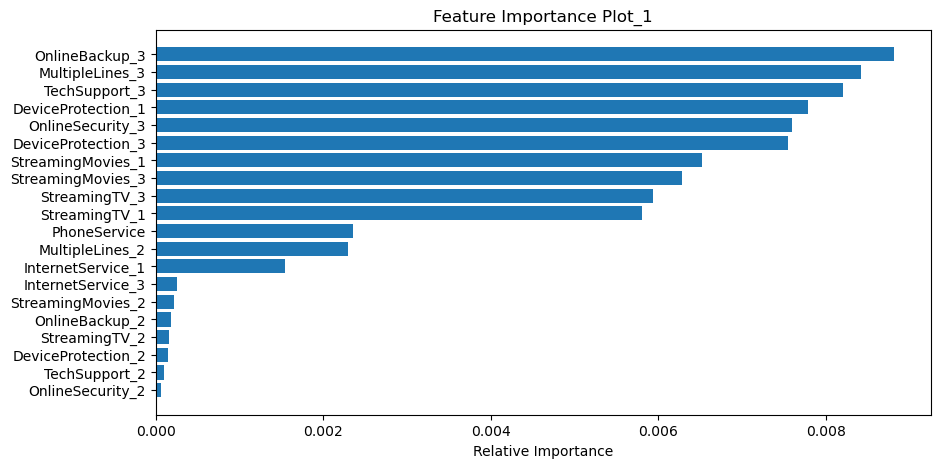

In [110]:
# 5.1 Applying Random Forest Regressor for Feature Importance

FtImp1 = RandomForestRegressor()

FtImp1.fit(InputVar,OutputVar)
FtName = list(InputVar.columns)
Importances = FtImp1.feature_importances_
Indices = np.argsort(Importances) [:20]

plt.figure(figsize=(10,5))
plt.barh(range(len(Indices)), Importances[Indices], align='center')
plt.yticks(range(len(Indices)),[FtName[i] for i in Indices])
plt.xlabel("Relative Importance")
plt.title("Feature Importance Plot_1");

###  Observations
The barplot shows the relative importance of the input features, with respect to their potential impact on a model's prediction of the output variable. Out of the top 20 input variables analyzed, the top 13 input variables can be considered as the high impact variables for the model accuracy in predicting the output variable. This provides insight for subsequent feature selection.

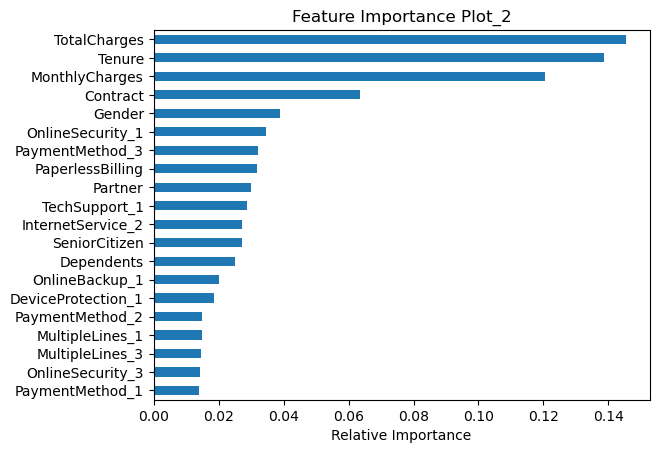

In [111]:
# 5.2 Applying Extra Trees Classifier for Feature Importance

ExTClass = ExtraTreesClassifier()
ExTClass.fit(InputVar,OutputVar)

# Plotting a Graph of Feature Importances
FtImp2 = pd.Series(ExTClass.feature_importances_, index=InputVar.columns)
ax = FtImp2.nlargest(20).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel("Relative Importance")
plt.title("Feature Importance Plot_2")
plt.show();

###  Observations
The top 13 input variables can be considered as the high impact variables for the model accuracy in predicting the output variable. This provides insight for subsequent feature selection.

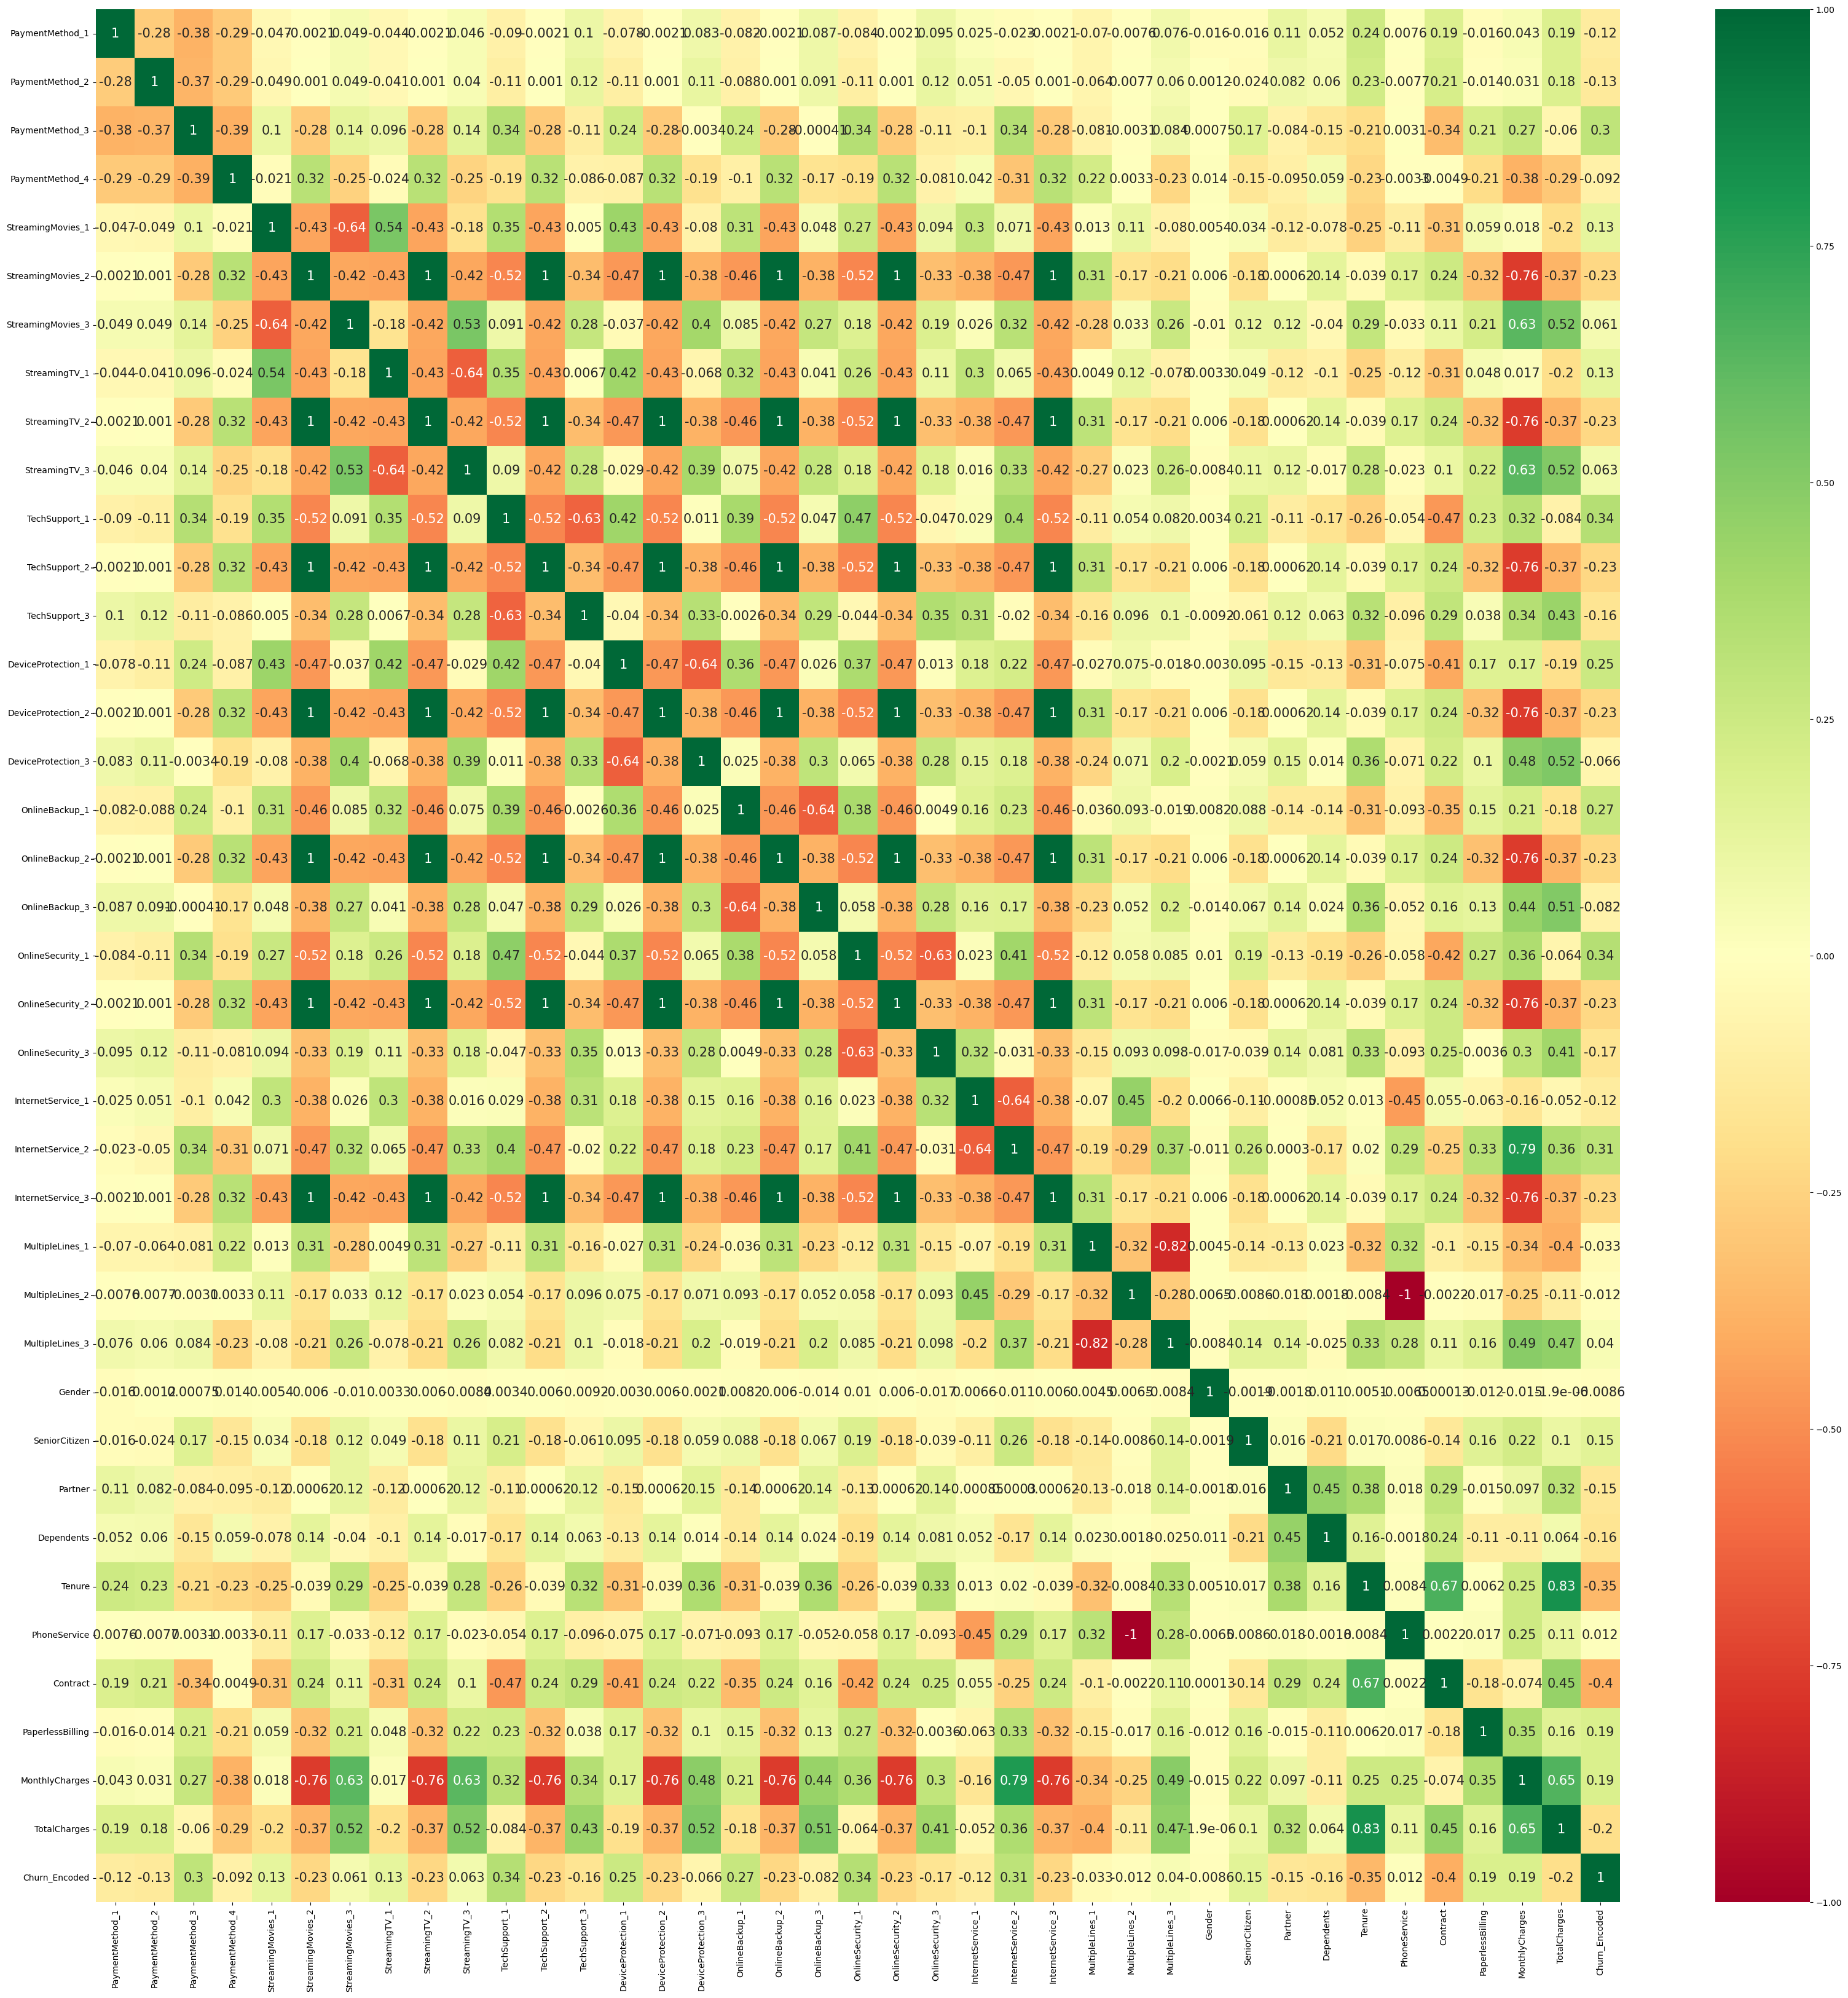

In [112]:
# 5.3 Applying the Correlation Matrix for Feature Importance

# Merging Input Features with the Output Feature into a single data frame
EncData = pd.concat([InputVar,OutputVar], axis=1)

CorrMat = EncData.corr()
TopCorrFts = CorrMat.index
plt.figure(figsize=(40,40))

CM = sb.heatmap(EncData[TopCorrFts].corr(),annot=True,cmap="RdYlGn", annot_kws={"fontsize":15});

###  Observations
The heatmap shows that there are no strong positive or negative direct correlations between the input variables and the output variable (Churn_Encoded). However, there are strong positive and negative correlations between some input variables which may impact the model's function in predicting the output variable.

# Question 4: Model Selection, Training, and Validation

# 1. Machine Learning

In [113]:
# Splitting the Datasets into Training and Testing Datasets

X_train, X_test, y_train, y_test = train_test_split(InputVar, OutputVar, test_size=0.2, random_state=42)

In [114]:
X_train.shape, X_test.shape

((5634, 38), (1409, 38))

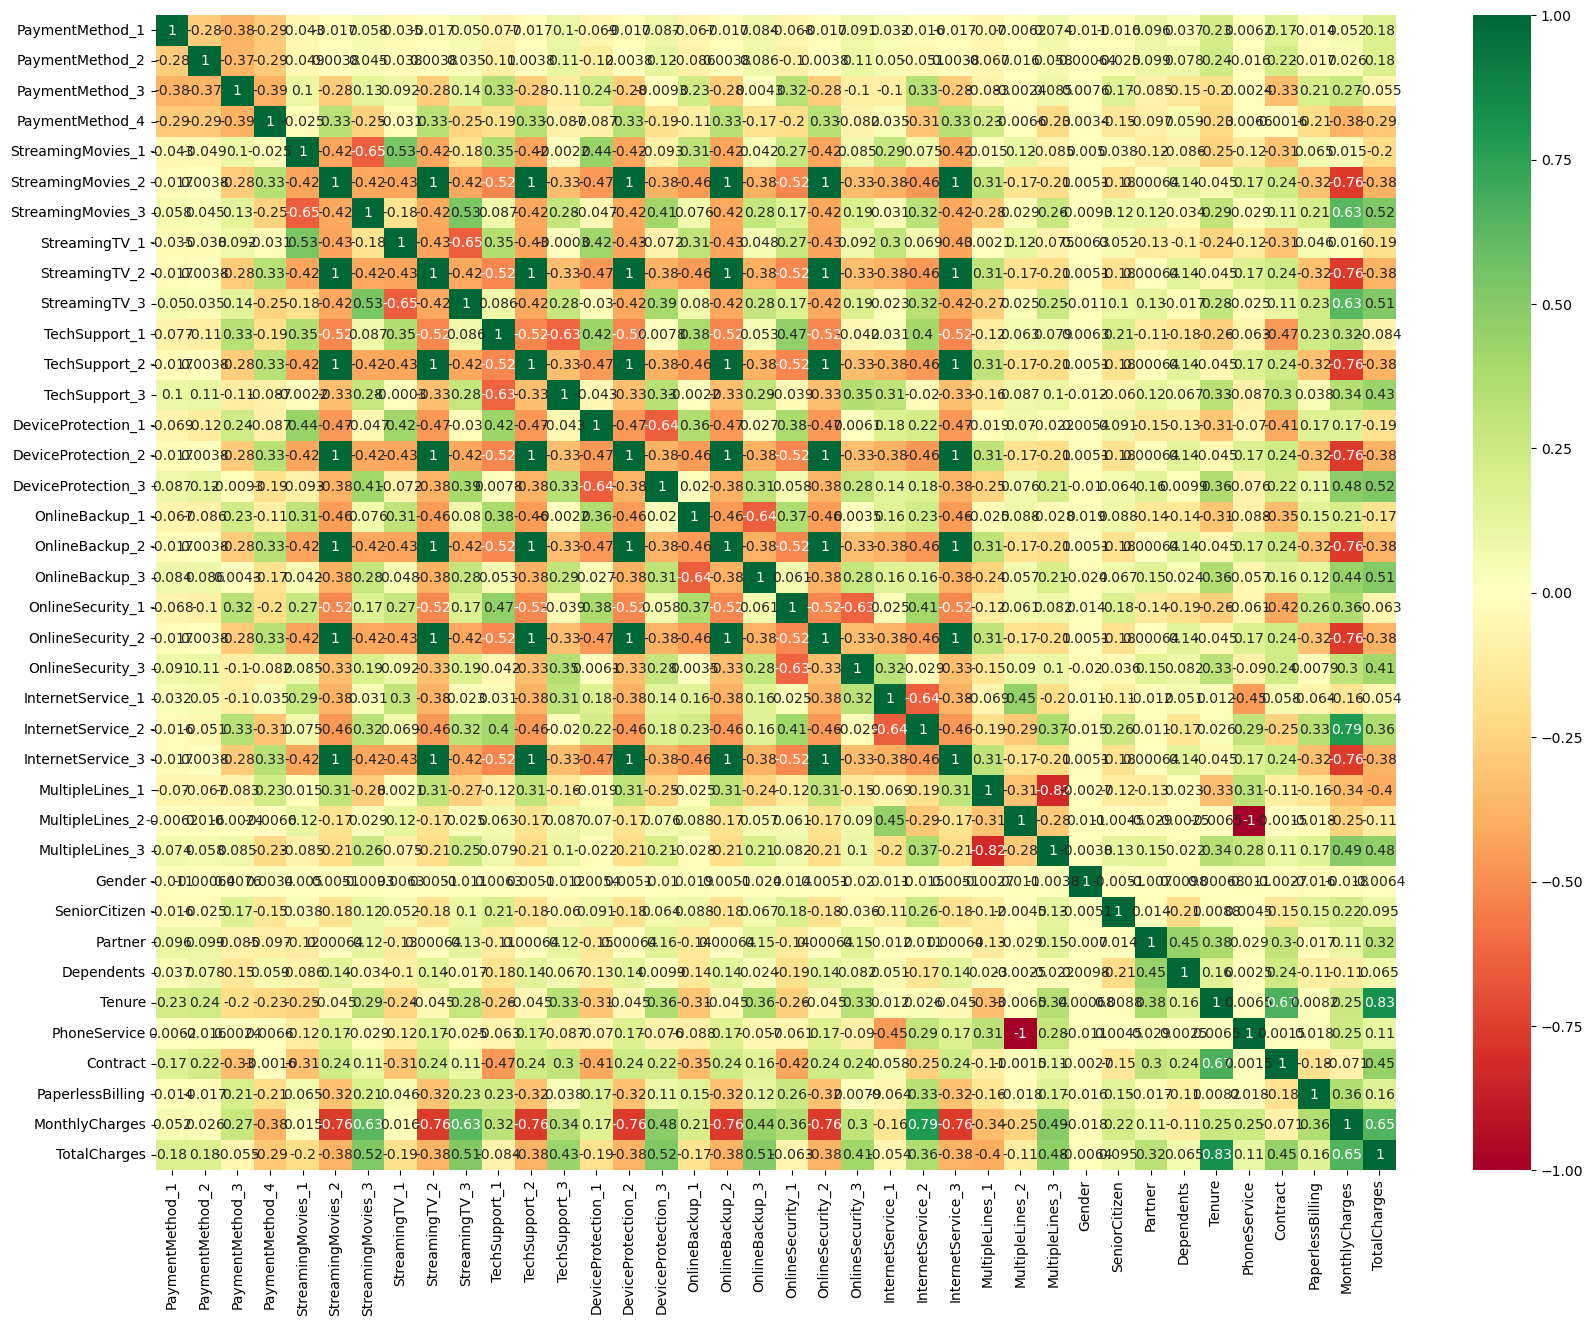

In [115]:
# Applying Feature Selection in the X_train dataset

# Using Pearson Correlation
plt.figure(figsize=(20,15))
CorrX = X_train.corr()
sb.heatmap(CorrX, annot=True, cmap="RdYlGn")
plt.show();

In [116]:
# Selecting Highly Correlated Features above a Threshold of 0.85 in the X_train Dataset

def correlation(dataset, threshold):
    CorrCols = set()                                     # Set of all correlated columns
    CorrMatrix_X = dataset.corr()
    for i in range(len(CorrMatrix_X.columns)):
        for j in range(i):
            if (CorrMatrix_X.iloc[i, j]) > threshold:
                ColunmName = CorrMatrix_X.columns[i]    # Getting the names of highly correlated columns
                CorrCols.add(ColunmName)
    return CorrCols

# Calling the Correlated Features
CorrFeatures = correlation(X_train, 0.85)
len(set(CorrFeatures))
CorrFeatures

{'DeviceProtection_2',
 'InternetService_3',
 'OnlineBackup_2',
 'OnlineSecurity_2',
 'StreamingTV_2',
 'TechSupport_2'}

In [117]:
# Dropping the highly correlated features in the X_train dataset
X_train1 = X_train.drop(CorrFeatures,axis=1)

In [118]:
# Dropping the highly correlated features in the X_test dataset
X_test1 = X_test.drop(CorrFeatures,axis=1)

In [119]:
X_train1.shape, X_test1.shape

((5634, 32), (1409, 32))

# 2. Model Building

In [120]:
# 2.1 Instantiating the Classifier Models
# 6 ML Algorithms will be applied to the Dataset

RF_mod = RandomForestClassifier()
DT_mod = DecisionTreeClassifier()
XGB_mod = XGBClassifier()
KNN_mod = KNeighborsClassifier()
SVC_mod = SVC()
LR_mod = LogisticRegression()

In [121]:
# 2.2 Fitting the Models on the Training Dataset

RF_mod.fit(X_train1,y_train)
DT_mod.fit(X_train1,y_train)
XGB_mod.fit(X_train1,y_train)
KNN_mod.fit(X_train1,y_train)
SVC_mod.fit(X_train1,y_train)
LR_mod.fit(X_train1,y_train)

LogisticRegression()

In [122]:
# 2.3 Generating Model Predictions from the Test Dataset

RF_pred = RF_mod.predict(X_test1)
DT_pred = DT_mod.predict(X_test1)
XGB_pred = XGB_mod.predict(X_test1)
KNN_pred = KNN_mod.predict(X_test1)
SVC_pred = SVC_mod.predict(X_test1)
LR_pred = LR_mod.predict(X_test1)

# Question 5: Model Evaluation

## 5.1 Model Evaluation by Metrics

In [123]:
# 5.1.1 Evaluating the Random Forest Classifier Model

print("Random Forest Classifier Model Evaluation")
print("Accuracy:", accuracy_score(y_test, RF_pred))
print("Precision:", precision_score(y_test, RF_pred))
print("Recall:", recall_score(y_test, RF_pred))
print("F1-score:", f1_score(y_test, RF_pred))
print("AUC-ROC:", roc_auc_score(y_test, RF_pred))

Random Forest Classifier Model Evaluation
Accuracy: 0.7998580553584103
Precision: 0.6666666666666666
Recall: 0.4879356568364611
F1-score: 0.5634674922600619
AUC-ROC: 0.7000489094993115


In [124]:
# 5.1.2 Evaluating the Decision Tree Classifier Model

print("Decision Tree Classifier Model Evaluation")
print("Accuracy:", accuracy_score(y_test, DT_pred))
print("Precision:", precision_score(y_test, DT_pred))
print("Recall:", recall_score(y_test, DT_pred))
print("F1-score:", f1_score(y_test, DT_pred))
print("AUC-ROC:", roc_auc_score(y_test, DT_pred))

Decision Tree Classifier Model Evaluation
Accuracy: 0.7175301632363378
Precision: 0.46736292428198434
Recall: 0.47989276139410186
F1-score: 0.47354497354497355
AUC-ROC: 0.6414907822414525


In [125]:
# 5.1.3 Evaluating the XGB Classifier Model

print("XGB Classifier Model Evaluation")
print("Accuracy:", accuracy_score(y_test, XGB_pred))
print("Precision:", precision_score(y_test, XGB_pred))
print("Recall:", recall_score(y_test, XGB_pred))
print("F1-score:", f1_score(y_test, XGB_pred))
print("AUC-ROC:", roc_auc_score(y_test, XGB_pred))

XGB Classifier Model Evaluation
Accuracy: 0.794889992902768
Precision: 0.6372549019607843
Recall: 0.5227882037533512
F1-score: 0.5743740795287187
AUC-ROC: 0.7078226733052472


In [126]:
# 5.1.4 Evaluating the K-Nearest Neighbors Classifier Model

print("K-Nearest Neighbors Classifier Model Evaluation")
print("Accuracy:", accuracy_score(y_test, KNN_pred))
print("Precision:", precision_score(y_test, KNN_pred))
print("Recall:", recall_score(y_test, KNN_pred))
print("F1-score:", f1_score(y_test, KNN_pred))
print("AUC-ROC:", roc_auc_score(y_test, KNN_pred))

K-Nearest Neighbors Classifier Model Evaluation
Accuracy: 0.7622427253371186
Precision: 0.558282208588957
Recall: 0.4879356568364611
F1-score: 0.5207439198855508
AUC-ROC: 0.674469758920161


In [127]:
# 5.1.5 Evaluating the Support Vector Classification (SVC) Model

print("Support Vector Classifier Model Evaluation")
print("Accuracy:", accuracy_score(y_test, SVC_pred))
print("Precision:", precision_score(y_test, SVC_pred))
print("Recall:", recall_score(y_test, SVC_pred))
print("F1-score:", f1_score(y_test, SVC_pred))
print("AUC-ROC:", roc_auc_score(y_test, SVC_pred))

Support Vector Classifier Model Evaluation
Accuracy: 0.8090844570617459
Precision: 0.6925925925925925
Recall: 0.5013404825737265
F1-score: 0.5816485225505443
AUC-ROC: 0.7106123262289483


In [128]:
# 5.1.6 Evaluating the Logistic Regression Classifier Model

print("Random Forest Classifier Model Evaluation")
print("Accuracy:", accuracy_score(y_test, LR_pred))
print("Precision:", precision_score(y_test, LR_pred))
print("Recall:", recall_score(y_test, LR_pred))
print("F1-score:", f1_score(y_test, LR_pred))
print("AUC-ROC:", roc_auc_score(y_test, LR_pred))

Random Forest Classifier Model Evaluation
Accuracy: 0.8211497515968772
Precision: 0.6873065015479877
Recall: 0.5951742627345844
F1-score: 0.6379310344827587
AUC-ROC: 0.7488419576221185


###  Observations
The logistic regression model performed the best in terms of all the metric scores (Accuracy, Precision, Recall, F1-score and AUC-ROC). The SVC model came second in most of the metric scores except for the precision score which was a little higher than that of the logistic regression model.

## 5.2 Model Evaluation by Confusion Matrix

In [129]:
# Defining the Confusion Matrix Function

def ConfMatrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="", cmap="coolwarm")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [130]:
# 5.2.1 Confusion Matrix for the Random Forest Classifier Model

#ConfMatrix(RF_mod,X_test1,y_test)

In [131]:
# 5.2.2 Confusion Matrix for the Decision Tree Classifier Model

#ConfMatrix(DT_mod,X_test1,y_test)

In [132]:
# 5.2.3 Confusion Matrix for the XGB Classifier Model

#ConfMatrix(XGB_mod,X_test1,y_test)

In [133]:
# 5.2.4 Confusion Matrix for the K-Nearest Neighbors Classifier Model

#ConfMatrix(KNN_mod,X_test1,y_test)

In [134]:
# 5.2.5 Confusion Matrix for the SVC Model

#ConfMatrix(SVC_mod,X_test1,y_test)

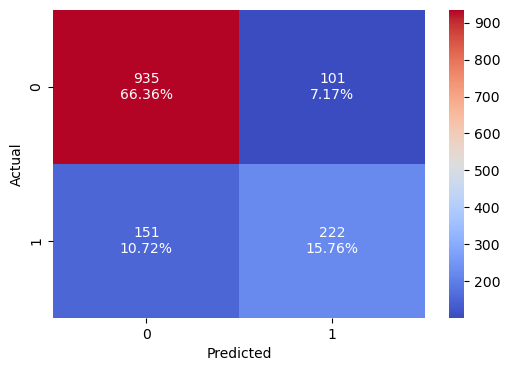

In [135]:
# 5.2.6 Confusion Matrix for the Logistic Regression Model

ConfMatrix(LR_mod,X_test1,y_test)

###  Observations
The model sensitivity indicates only 59.5% of True Positives were accurately predicted.

- This implies the model predicted a lot of False Negatives. Customers predicted to have not churned, but who have actually churned.

- True Negatives were accurately predicted to an acceptable level (90.2%).

- However, the model must be fine tuned to reduce False Positives (Increase Precision) and more especially False Negatives (Increase Recall).

# Recommendations and Conclusion

To maintain business competitiveness, attain business objectives, and reduce customer attrition, ConnectTel must focus on minimizing false negatives as this will have a more negative financial impact as concerns revenue maintenance.

- Data-driven Customer Segmentation: Apply advance analytics to segment customers according to their behavior, preferences, consumption patterns, and demographics in order to implement various retention strategies for different customer segments.

- Customized Retention Strategies: Deploy machine learning models to predict churn probability for various customer segments in order to tailor retention offers to meet specific preferences when the probability of potential customer churn is high.

- Application of customer feedback analysis for tailored enhancement of customer experience.

- Implementation of periodic competitive price revisions and incentive package offering to maintain customer loyalty (e.g Seasonal discounts, package discounts and long-term customer reward schemes).